In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk mengubah angka besar menjadi format yang dapat dibaca
from numerize.numerize import numerize

In [2]:
# Mengatur ukuran default dan tingkat dpi plot
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams["figure.dpi"] = 250

# Mengatur ukuran default judul plot dan label sumbu
plt.rcParams["axes.titlesize"] = 15
plt.rcParams["axes.labelsize"] = 12

# Mengatur bobot default judul plot dan label sumbu
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams["axes.labelweight"] = 'bold'

# Untuk menampilkan semua kolom
pd.set_option("display.max_columns", None)

In [3]:
df= pd.read_csv('Raw Dataset/fraudTrain.csv')

df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [4]:
# Memeriksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
# Memeriksa tipe data object
df.select_dtypes(include='object').columns

Index(['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
       'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'],
      dtype='object')

In [6]:
# Memeriksa jumlah nilai null di setiap kolom
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [7]:
# Memeriksa jumlah baris duplikat
df.duplicated().sum()

np.int64(0)

In [8]:
# Membuat fungsi untuk memberi anotasi pada batang
def annotate_bars(ax, decimal=True, type = None):
    
    # Ulangi setiap bar
    for bar in ax.patches:
        height = bar.get_height()

        # Periksa apakah tingginya lebih besar atau sama dengan 1000 untuk penomoran
        if height >= 1000:
            
            # Nomorisasikan nilainya
            value = numerize(height)
            
            if not decimal:
                value = f"{round(float(value[:-1]))}{value[-1]}"
            else:
                value = f"{round(float(value[:-1]), 1)}{value[-1]}"

        elif 0 < height < 1000:
            
            # Untuk nilai yang lebih kecil
            if not decimal:
                value = round(height)
            else:
                value = round(height, 1)


            if type == "percent":
                value = f"{value}%"

        if height > 0:
            # Beri anotasi pada batang dengan nilai yang dihitung
            ax.annotate(
                value,
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontweight='bold'
            )

Exploratory Data Analysis (EDA)

In [9]:
# Hapus kolom yang tidak diperlukan
df.drop(columns=["Unnamed: 0", "unix_time", "cc_num", "first", "last", "merchant"], inplace=True)

In [10]:
# Mengubah 'trans_date_trans_time' dan 'dob' ke format datetime
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['dob'] = pd.to_datetime(df['dob'])

In [11]:
# Membuat kolom 'age' dengan menghitung umur tahun transaksi dengan tahun lahir
df['age'] = df['trans_date_trans_time'].dt.year - df['dob'].dt.year

df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,31
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,41
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,57
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,52
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,33


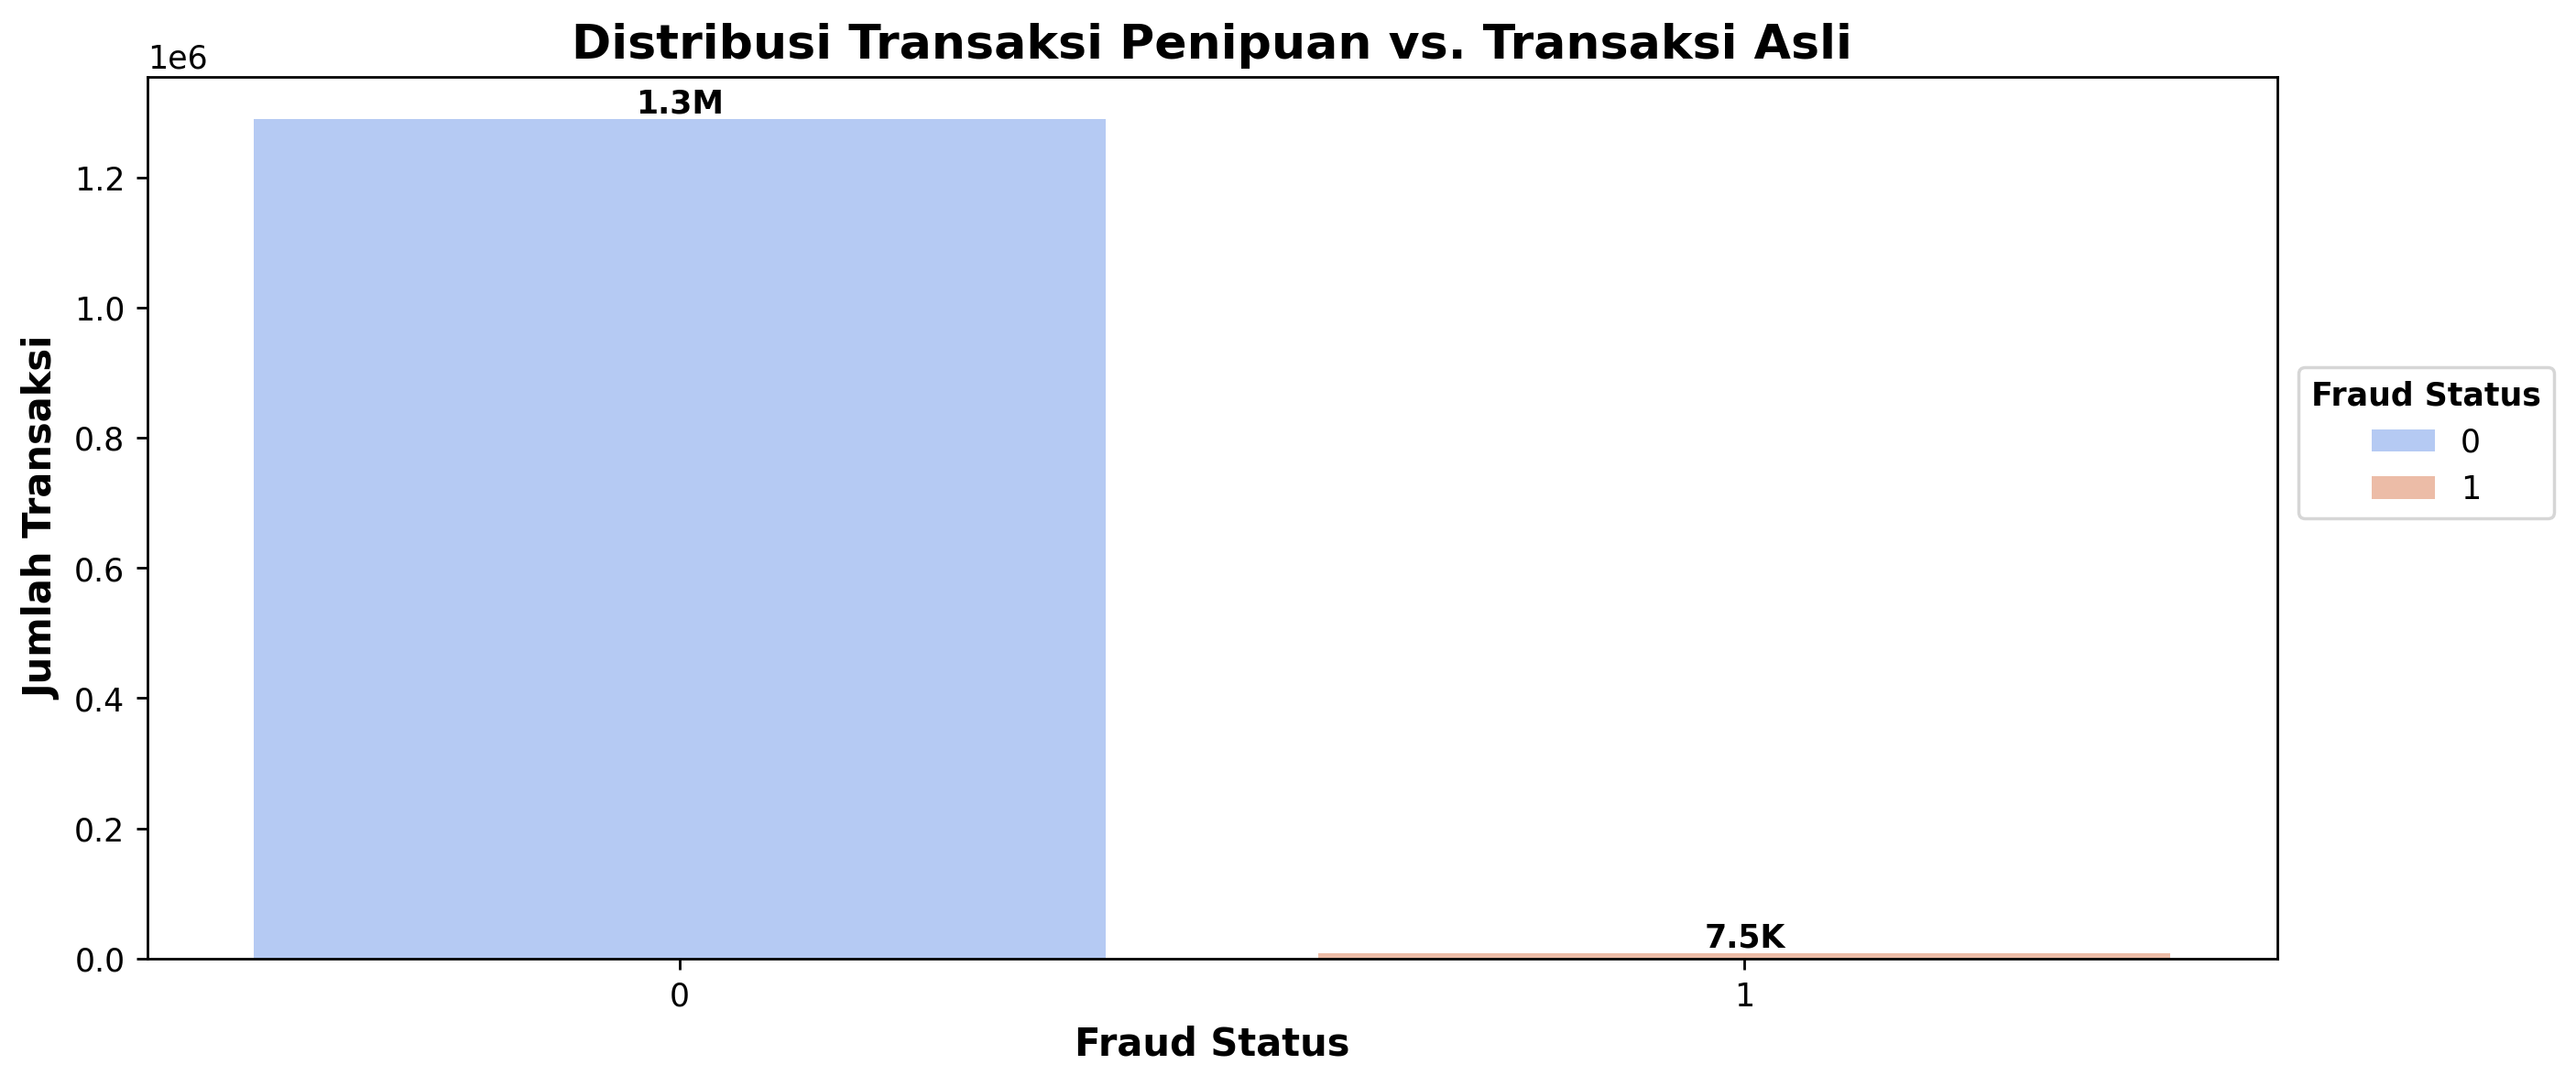

In [12]:
# Memeriksa jumlah transaksi penipuan dibandingkan dengan yang asli
ax = sns.countplot(
    data = df,
    x = "is_fraud",
    hue = "is_fraud",
    palette = 'coolwarm',
    dodge = False
)

# Membuat anotasi pada batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Transaksi Penipuan vs. Transaksi Asli")
plt.xlabel("Fraud Status")
plt.ylabel("Jumlah Transaksi")

# Mengatur lokasi
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

In [13]:
# Menambahkan kolom baru untuk menunjukkan hari dalam seminggu saat setiap transaksi dilakukan
df['day_of_week'] = df['trans_date_trans_time'].dt.day_name()
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age,day_of_week
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,31,Tuesday
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,41,Tuesday
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,57,Tuesday
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,52,Tuesday
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,33,Tuesday


In [14]:
# Menambahkan kolom baru untuk menunjukkan menit setiap transaksi
df['transaction_min'] = df['trans_date_trans_time'].dt.minute
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age,day_of_week,transaction_min
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,31,Tuesday,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,41,Tuesday,0
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,57,Tuesday,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,52,Tuesday,1
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,33,Tuesday,3


In [15]:
# Menambahkan kolom baru untuk menunjukkan jam setiap transaksi
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age,day_of_week,transaction_min,transaction_hour
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,31,Tuesday,0,0
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,41,Tuesday,0,0
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,57,Tuesday,0,0
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,52,Tuesday,1,0
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,33,Tuesday,3,0


In [16]:
# Menambahkan kolom baru untuk menunjukkan hari setiap transaksi
df['transaction_date'] = df['trans_date_trans_time'].dt.day
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age,day_of_week,transaction_min,transaction_hour,transaction_date
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,31,Tuesday,0,0,1
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,41,Tuesday,0,0,1
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,57,Tuesday,0,0,1
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,52,Tuesday,1,0,1
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,33,Tuesday,3,0,1


In [17]:
# Menambahkan kolom baru untuk menunjukkan bulan setiap transaksi
df['transaction_month'] = df['trans_date_trans_time'].dt.month
df.head()

,trans_date_trans_time,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,age,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month
0,2019-01-01 00:00:18,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,31,Tuesday,0,0,1,1
1,2019-01-01 00:00:44,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,41,Tuesday,0,0,1,1
2,2019-01-01 00:00:51,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,57,Tuesday,0,0,1,1
3,2019-01-01 00:01:16,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,52,Tuesday,1,0,1,1
4,2019-01-01 00:03:06,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,33,Tuesday,3,0,1,1


In [18]:
# Hapus kolom yang tidak diperlukan
df.drop(columns=["trans_date_trans_time", "dob"], inplace=True)
df.head()

,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month
0,misc_net,4.97,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,31,Tuesday,0,0,1,1
1,grocery_pos,107.23,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,41,Tuesday,0,0,1,1
2,entertainment,220.11,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,57,Tuesday,0,0,1,1
3,gas_transport,45.00,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,52,Tuesday,1,0,1,1
4,misc_pos,41.96,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,33,Tuesday,3,0,1,1


Text(0, 0.5, 'Jumlah Transaksi')

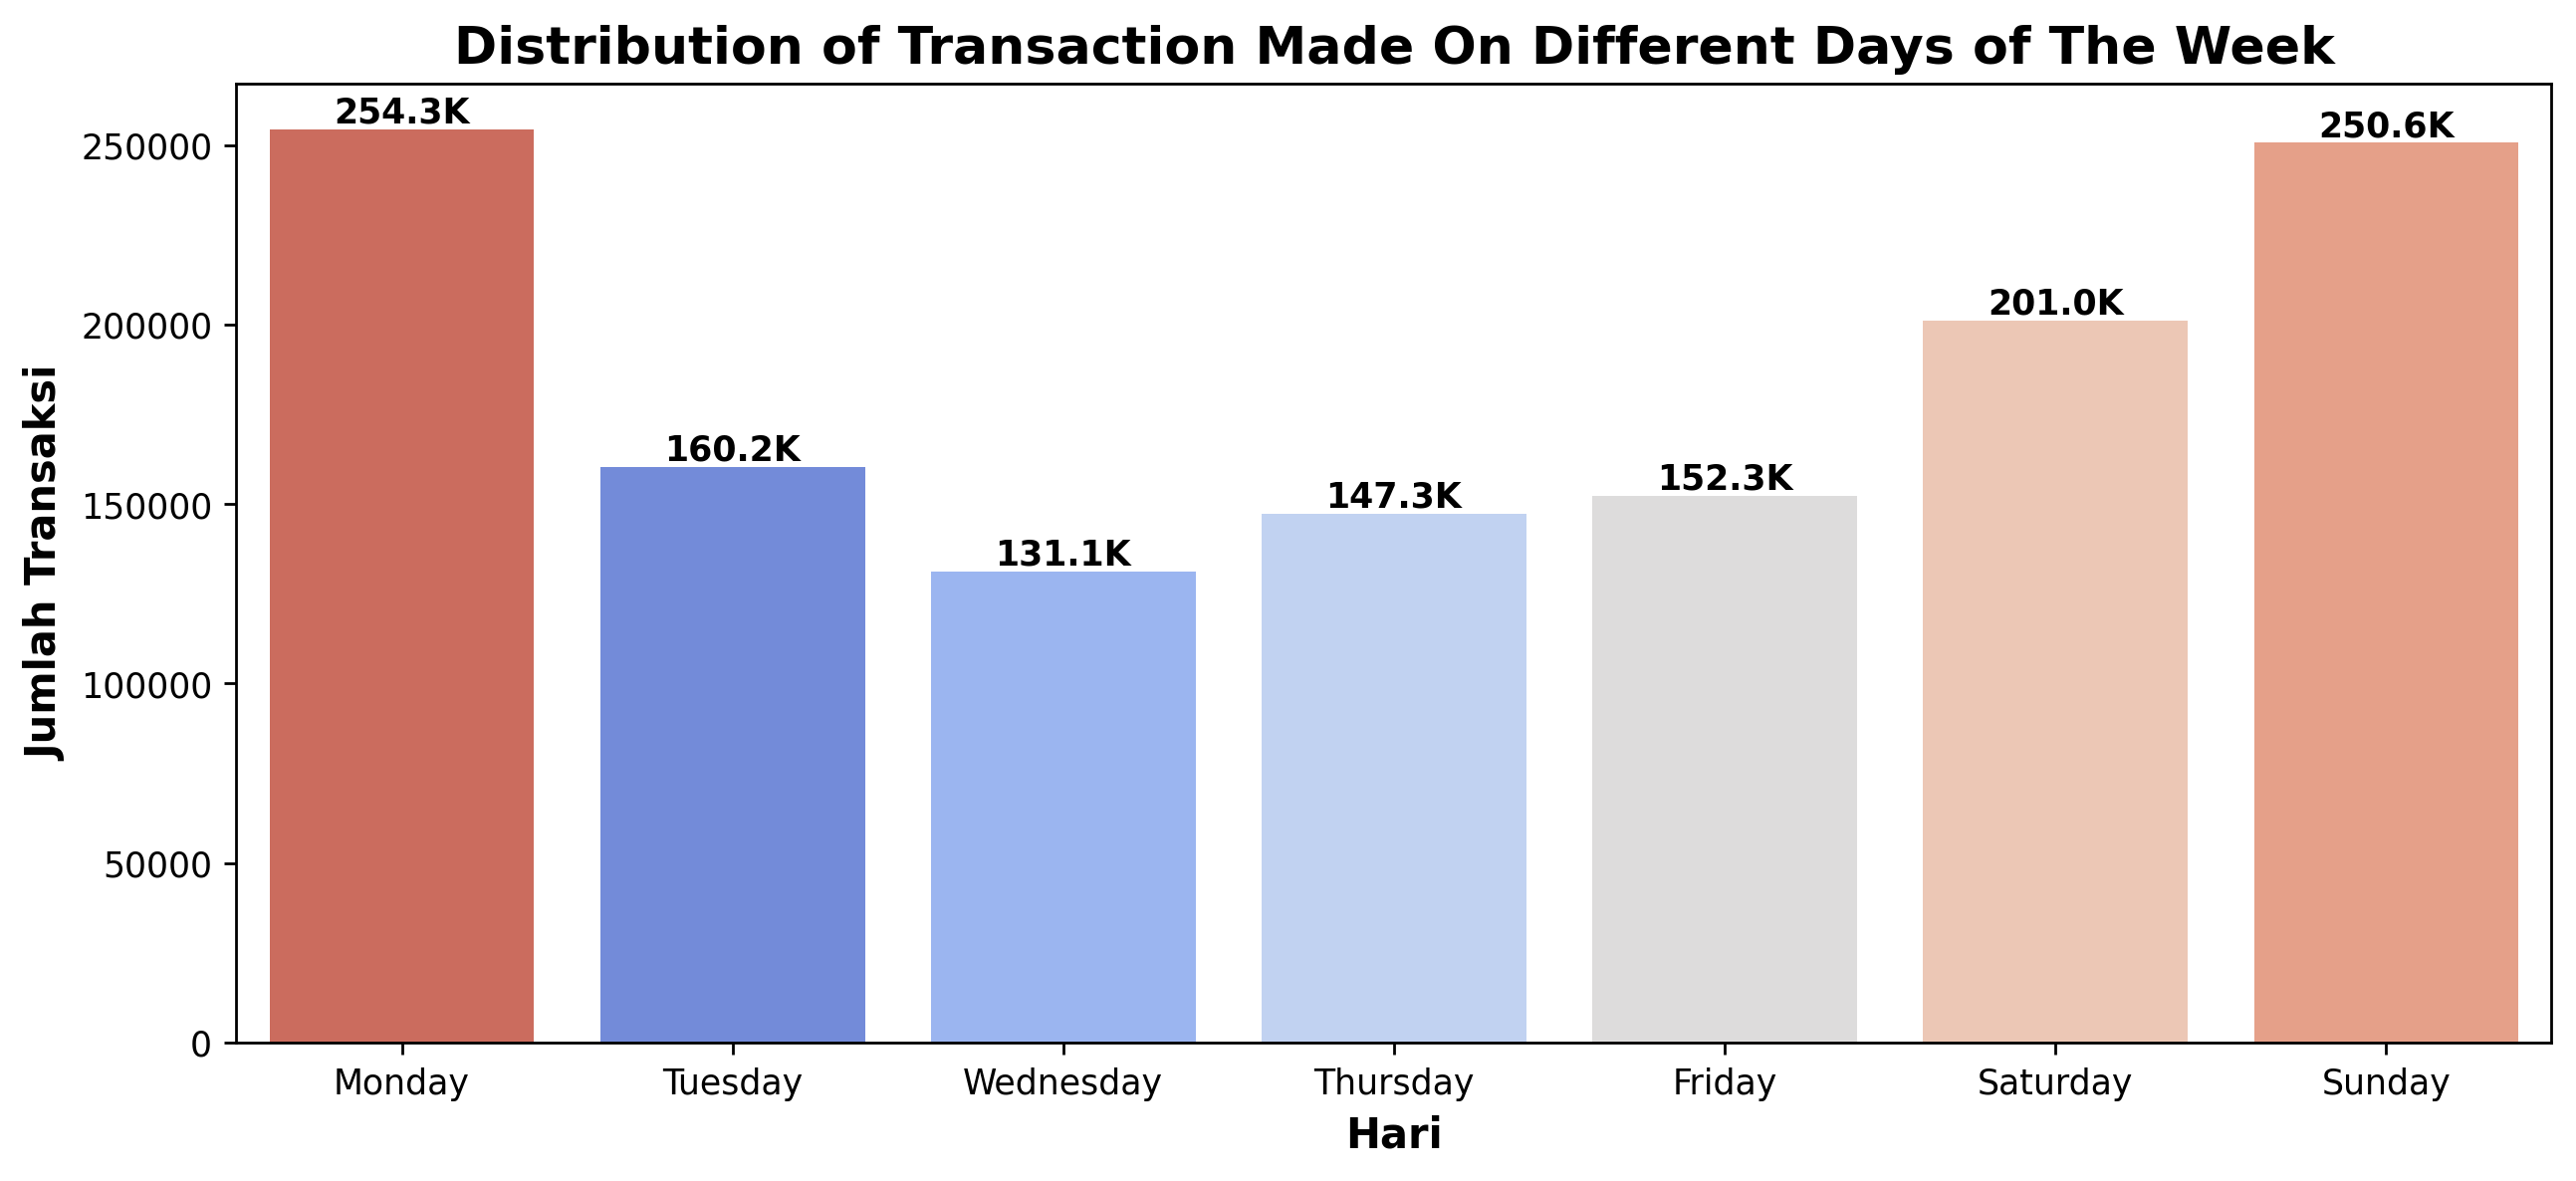

In [19]:
# Memeriksa distribusi transaksi yang dilakukan pada hari yang berbeda dalam seminggu
ax = sns.countplot(
    data = df,
    x = "day_of_week",
    hue = "day_of_week",
    palette = 'coolwarm',
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    dodge = False
)

# Membuat anotasi pada batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribution of Transaction Made On Different Days of The Week")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")

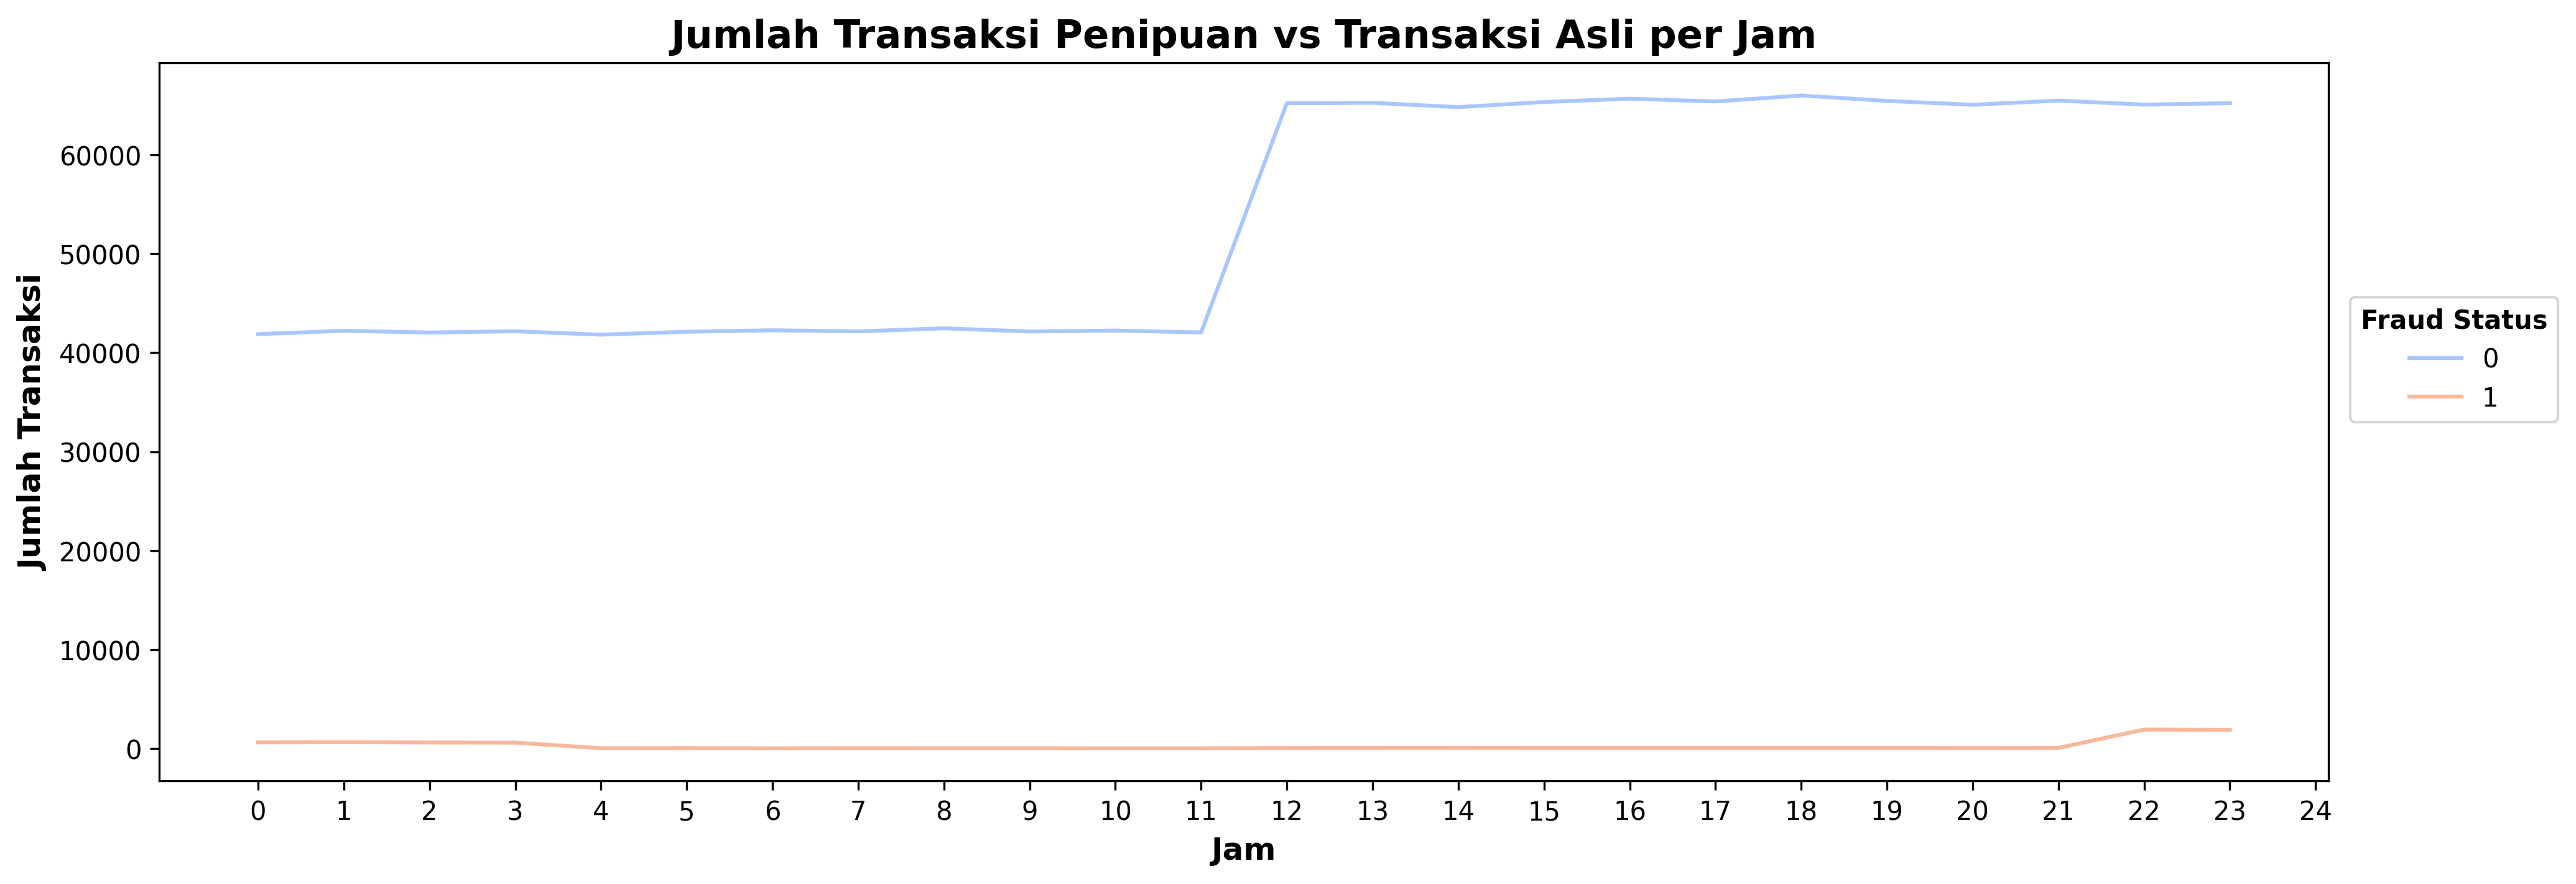

In [20]:
# Mengatur ukuran plot
plt.figure(figsize = (15, 5), dpi = 300)

# Memeriksa berapa banyak transaksi penipuan vs transaksi asli yang dilakukan setiap jam
sns.lineplot(
    data = df.groupby(["transaction_hour", "is_fraud"], as_index = False)["trans_num"].count(),
    x = "transaction_hour",
    y = "trans_num",
    hue = "is_fraud",
    palette = "coolwarm"
)

# Menambahkan judul dan label ke plot
plt.title("Jumlah Transaksi Penipuan vs Transaksi Asli per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Transaksi")

# Mengubah nilai xtick
plt.xticks(range(0, 25))

# Mengatur lokasi
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

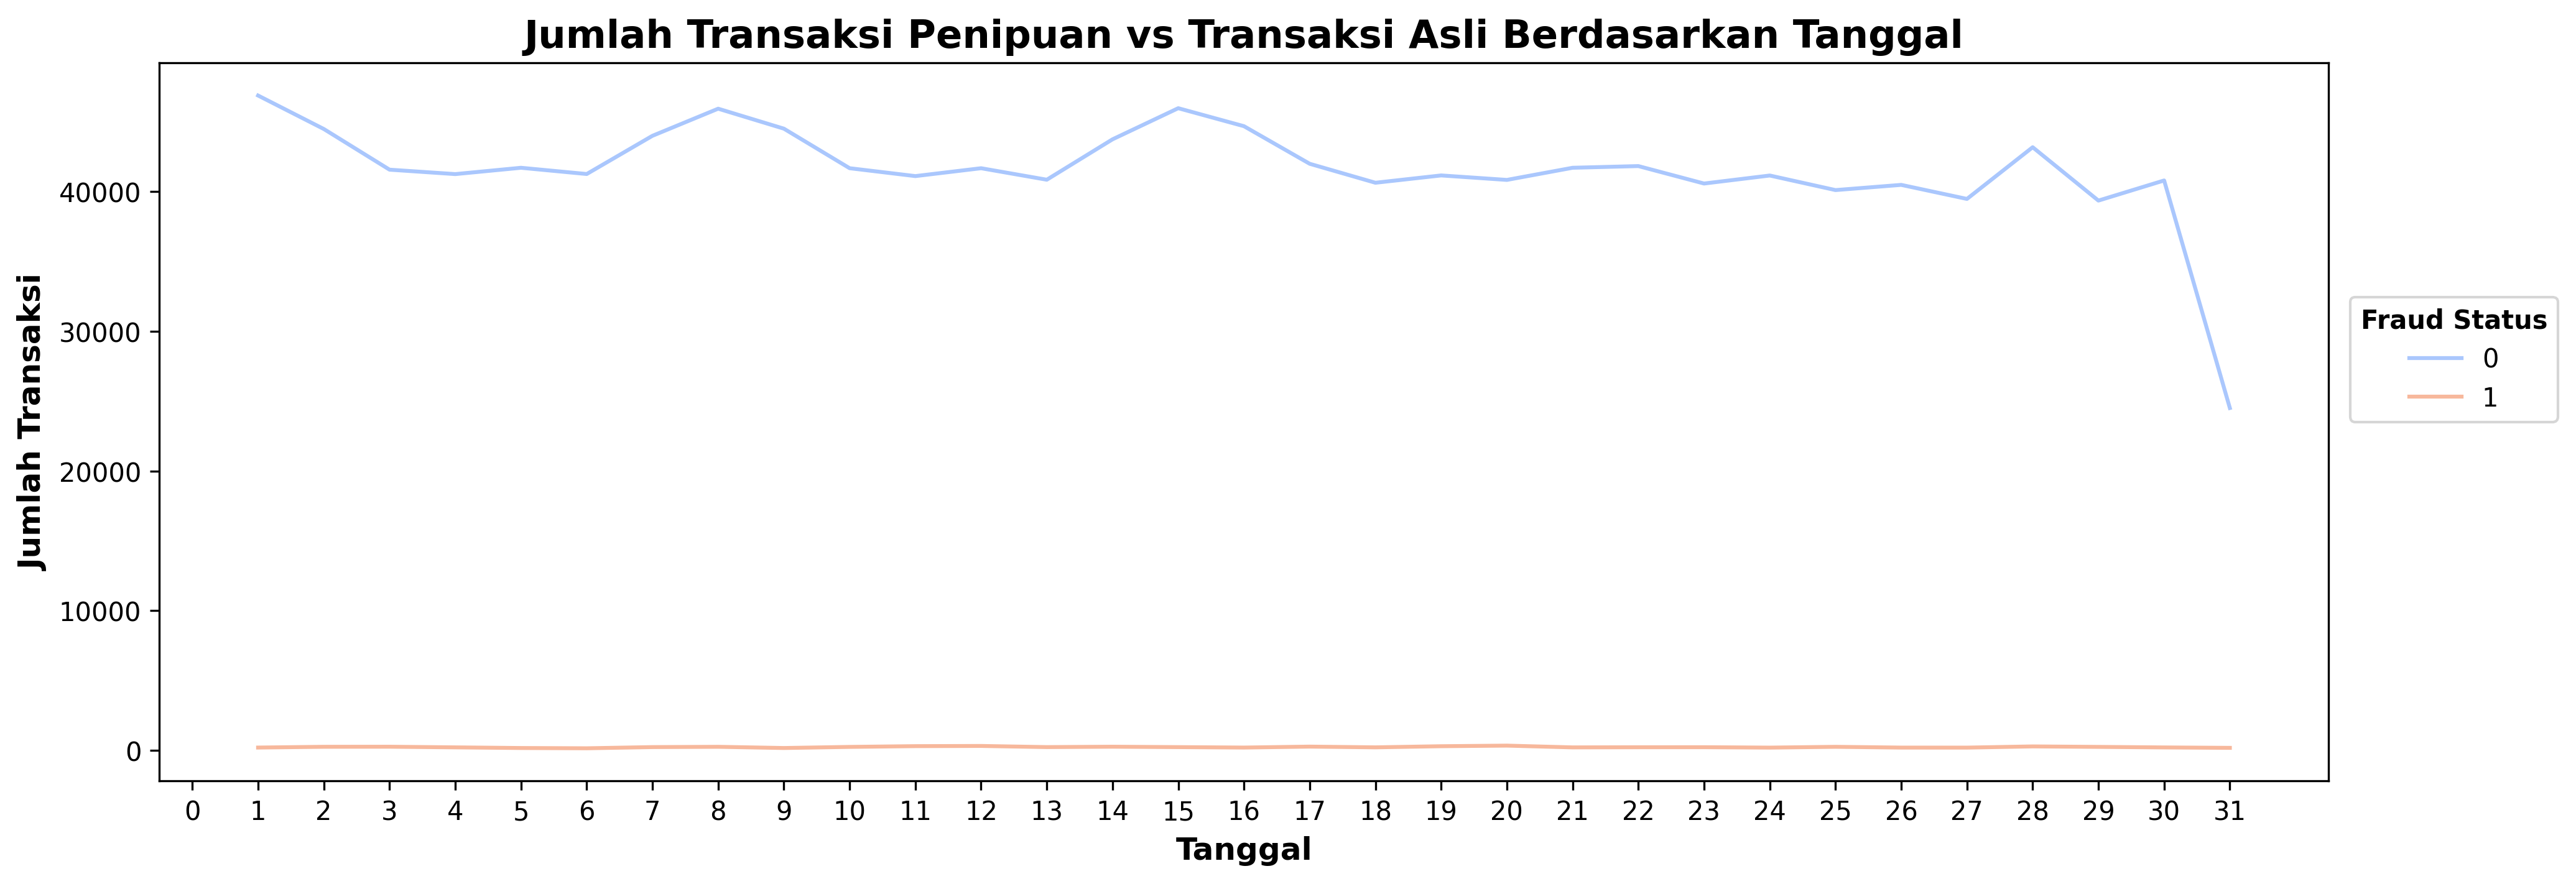

In [21]:
# Mengatur ukuran plot
plt.figure(figsize = (15, 5), dpi = 300)

# Memeriksa berapa banyak transaksi penipuan vs transaksi asli yang dilakukan setiap tanggal
sns.lineplot(
    data = df.groupby(["transaction_date", "is_fraud"], as_index = False)["trans_num"].count(),
    x = "transaction_date",
    y = "trans_num",
    hue = "is_fraud",
    palette = "coolwarm"
)

# Menambahkan judul dan label ke plot
plt.title("Jumlah Transaksi Penipuan vs Transaksi Asli Berdasarkan Tanggal")
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Transaksi")

# Mengubah nilai xtick
plt.xticks(range(0, 32))

# Mengatur lokasi
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

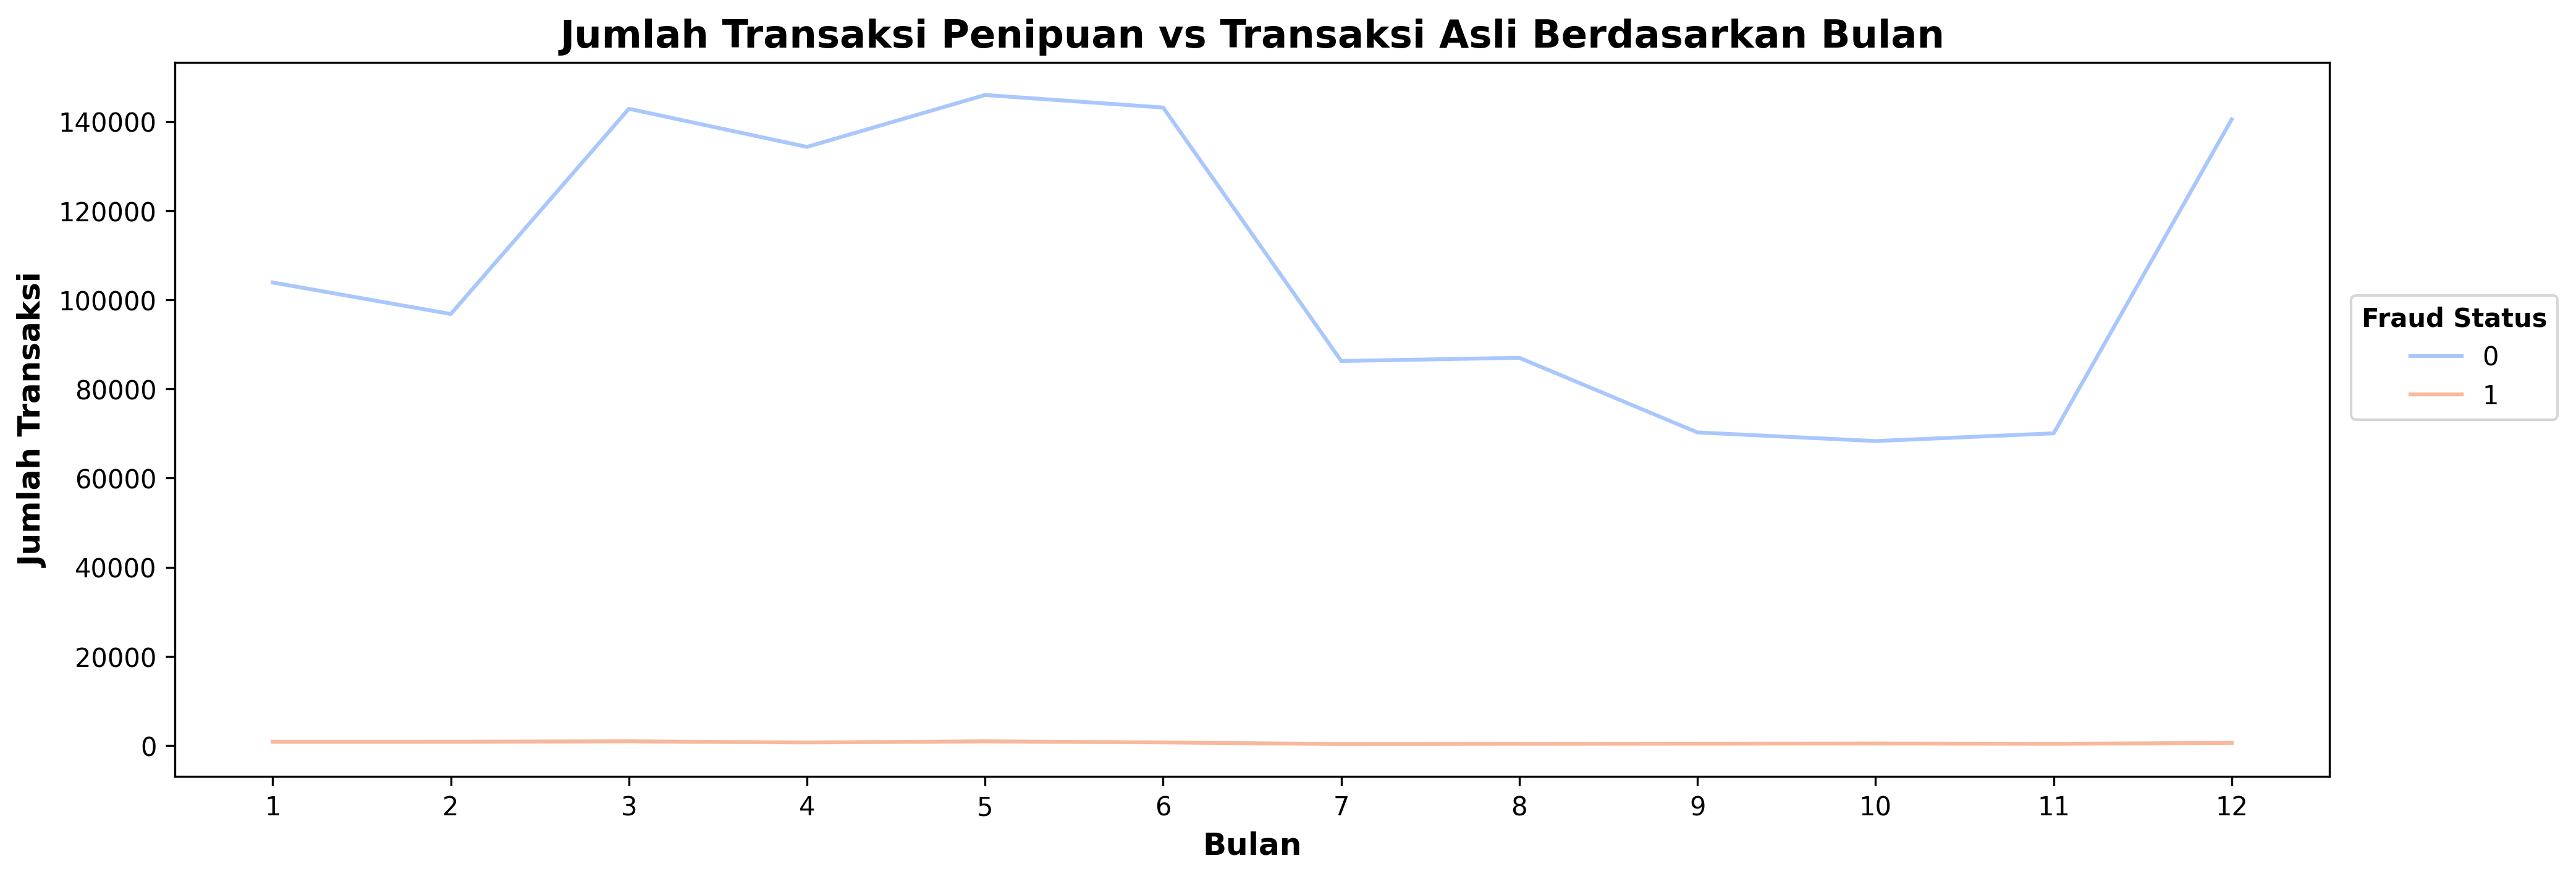

In [22]:
# Mengatur ukuran plot
plt.figure(figsize = (15, 5), dpi = 300)

# Memeriksa berapa banyak transaksi penipuan vs transaksi asli yang dilakukan setiap tanggal
sns.lineplot(
    data = df.groupby(["transaction_month", "is_fraud"], as_index = False)["trans_num"].count(),
    x = "transaction_month",
    y = "trans_num",
    hue = "is_fraud",
    palette = "coolwarm"
)

# Menambahkan judul dan label ke plot
plt.title("Jumlah Transaksi Penipuan vs Transaksi Asli Berdasarkan Bulan")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Transaksi")

# Mengubah nilai xtick
plt.xticks(range(1, 13))

# Mengatur lokasi
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

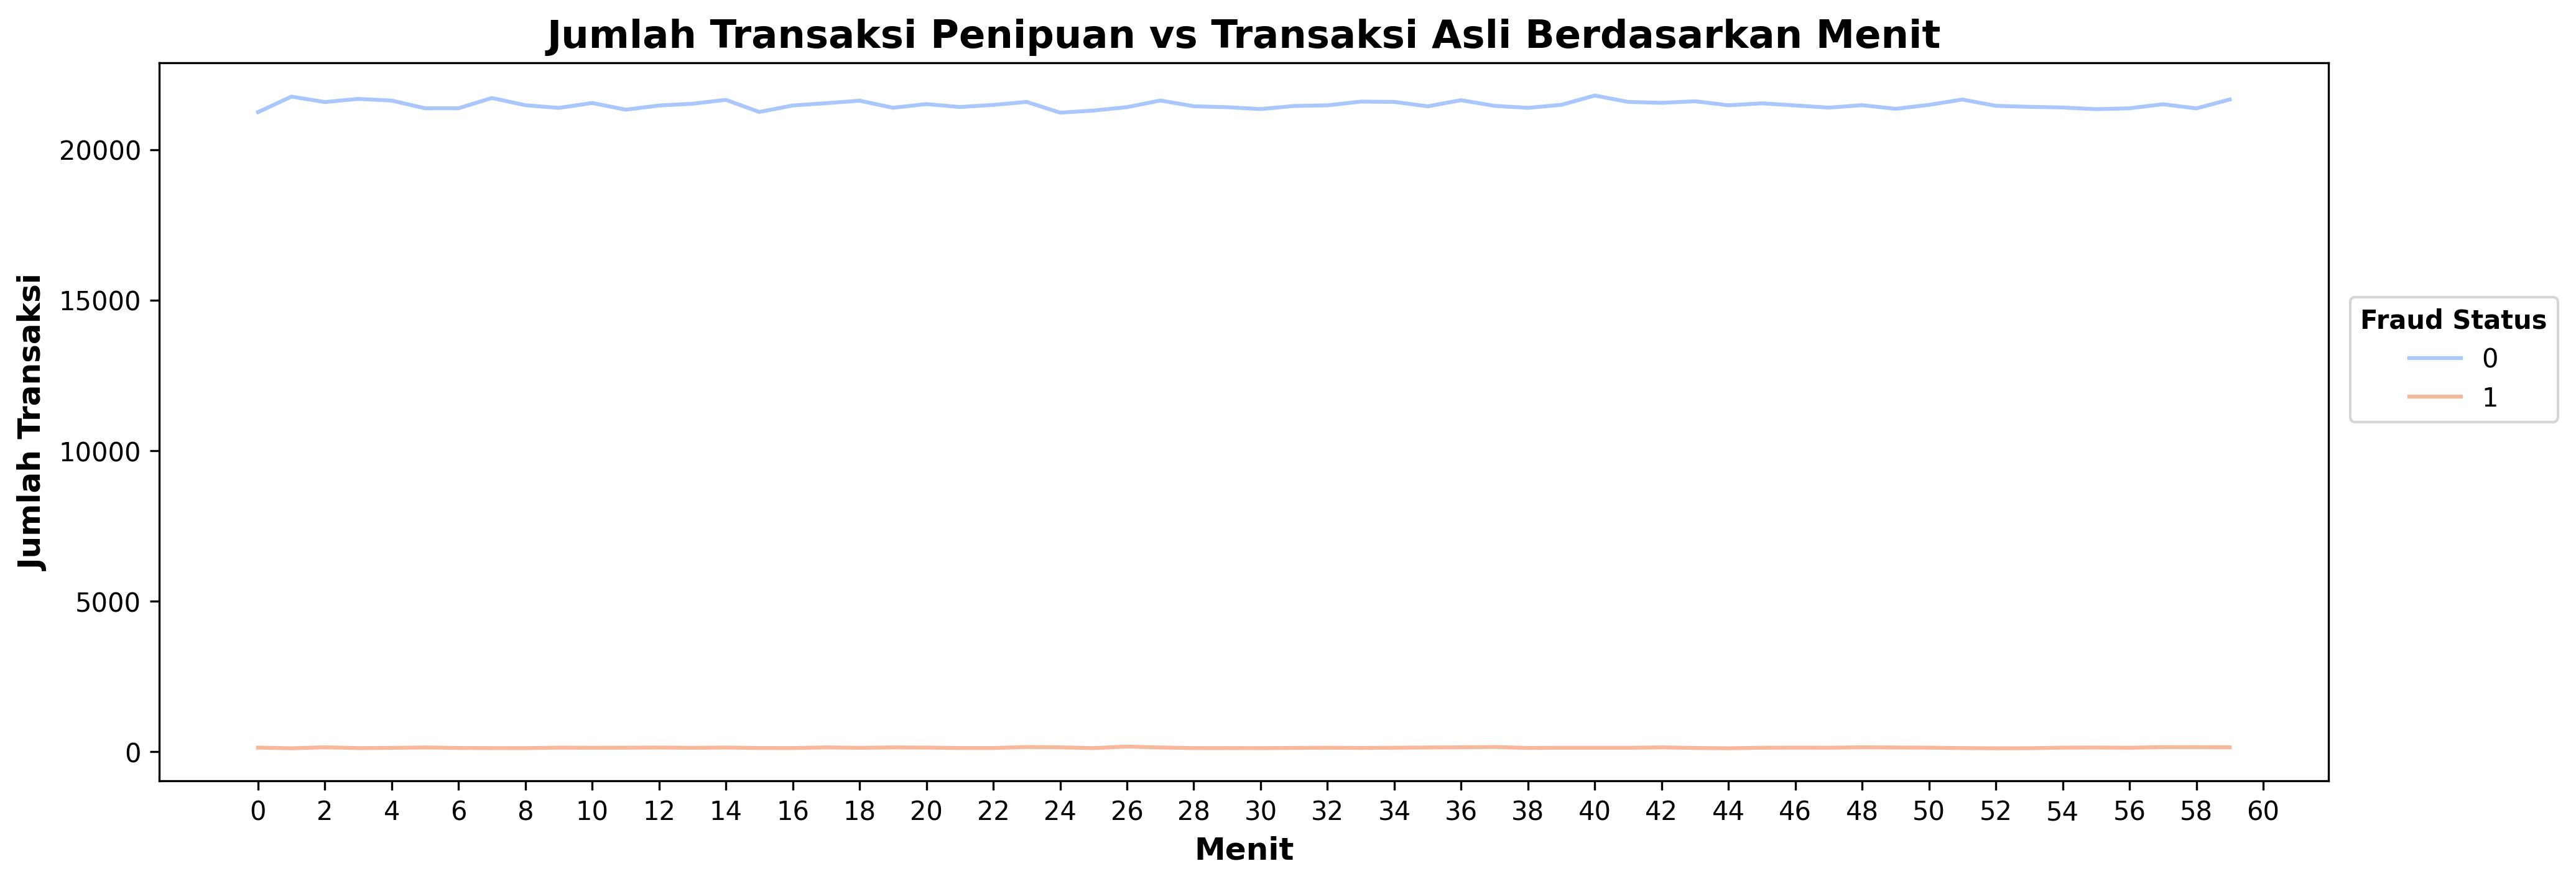

In [23]:
# Mengatur ukuran plot
plt.figure(figsize = (15, 5), dpi = 300)

# Memeriksa berapa banyak transaksi penipuan vs transaksi asli yang dilakukan setiap tanggal
sns.lineplot(
    data = df.groupby(["transaction_min", "is_fraud"], as_index = False)["trans_num"].count(),
    x = "transaction_min",
    y = "trans_num",
    hue = "is_fraud",
    palette = "coolwarm"
)

# Menambahkan judul dan label ke plot
plt.title("Jumlah Transaksi Penipuan vs Transaksi Asli Berdasarkan Menit")
plt.xlabel("Menit")
plt.ylabel("Jumlah Transaksi")

# Mengubah nilai xtick
plt.xticks(range(0, 61, 2))

# Mengatur lokasi
plt.legend(title = "Fraud Status", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.5));

In [24]:
# Menyaring transaksi penipuan dan mengelompokkannya berdasarkan hari dalam sebulan
fraud_df_month = df.groupby("transaction_date", as_index=False)["is_fraud"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Hitung tingkat penipuan
fraud_df_month["fraud_rate"] = fraud_df_month["fraudulent_transaction_count"] / fraud_df_month["total_transaction_count"]
fraud_df_month

,transaction_date,fraudulent_transaction_count,total_transaction_count,fraud_rate
0,1,209,47089,0.004438
1,2,264,44748,0.005900
2,3,269,41842,0.006429
3,4,223,41479,0.005376
4,5,177,41886,0.004226
5,6,158,41420,0.003815
6,7,242,44239,0.005470
7,8,263,46201,0.005693
8,9,177,44685,0.003961
9,10,256,41934,0.006105


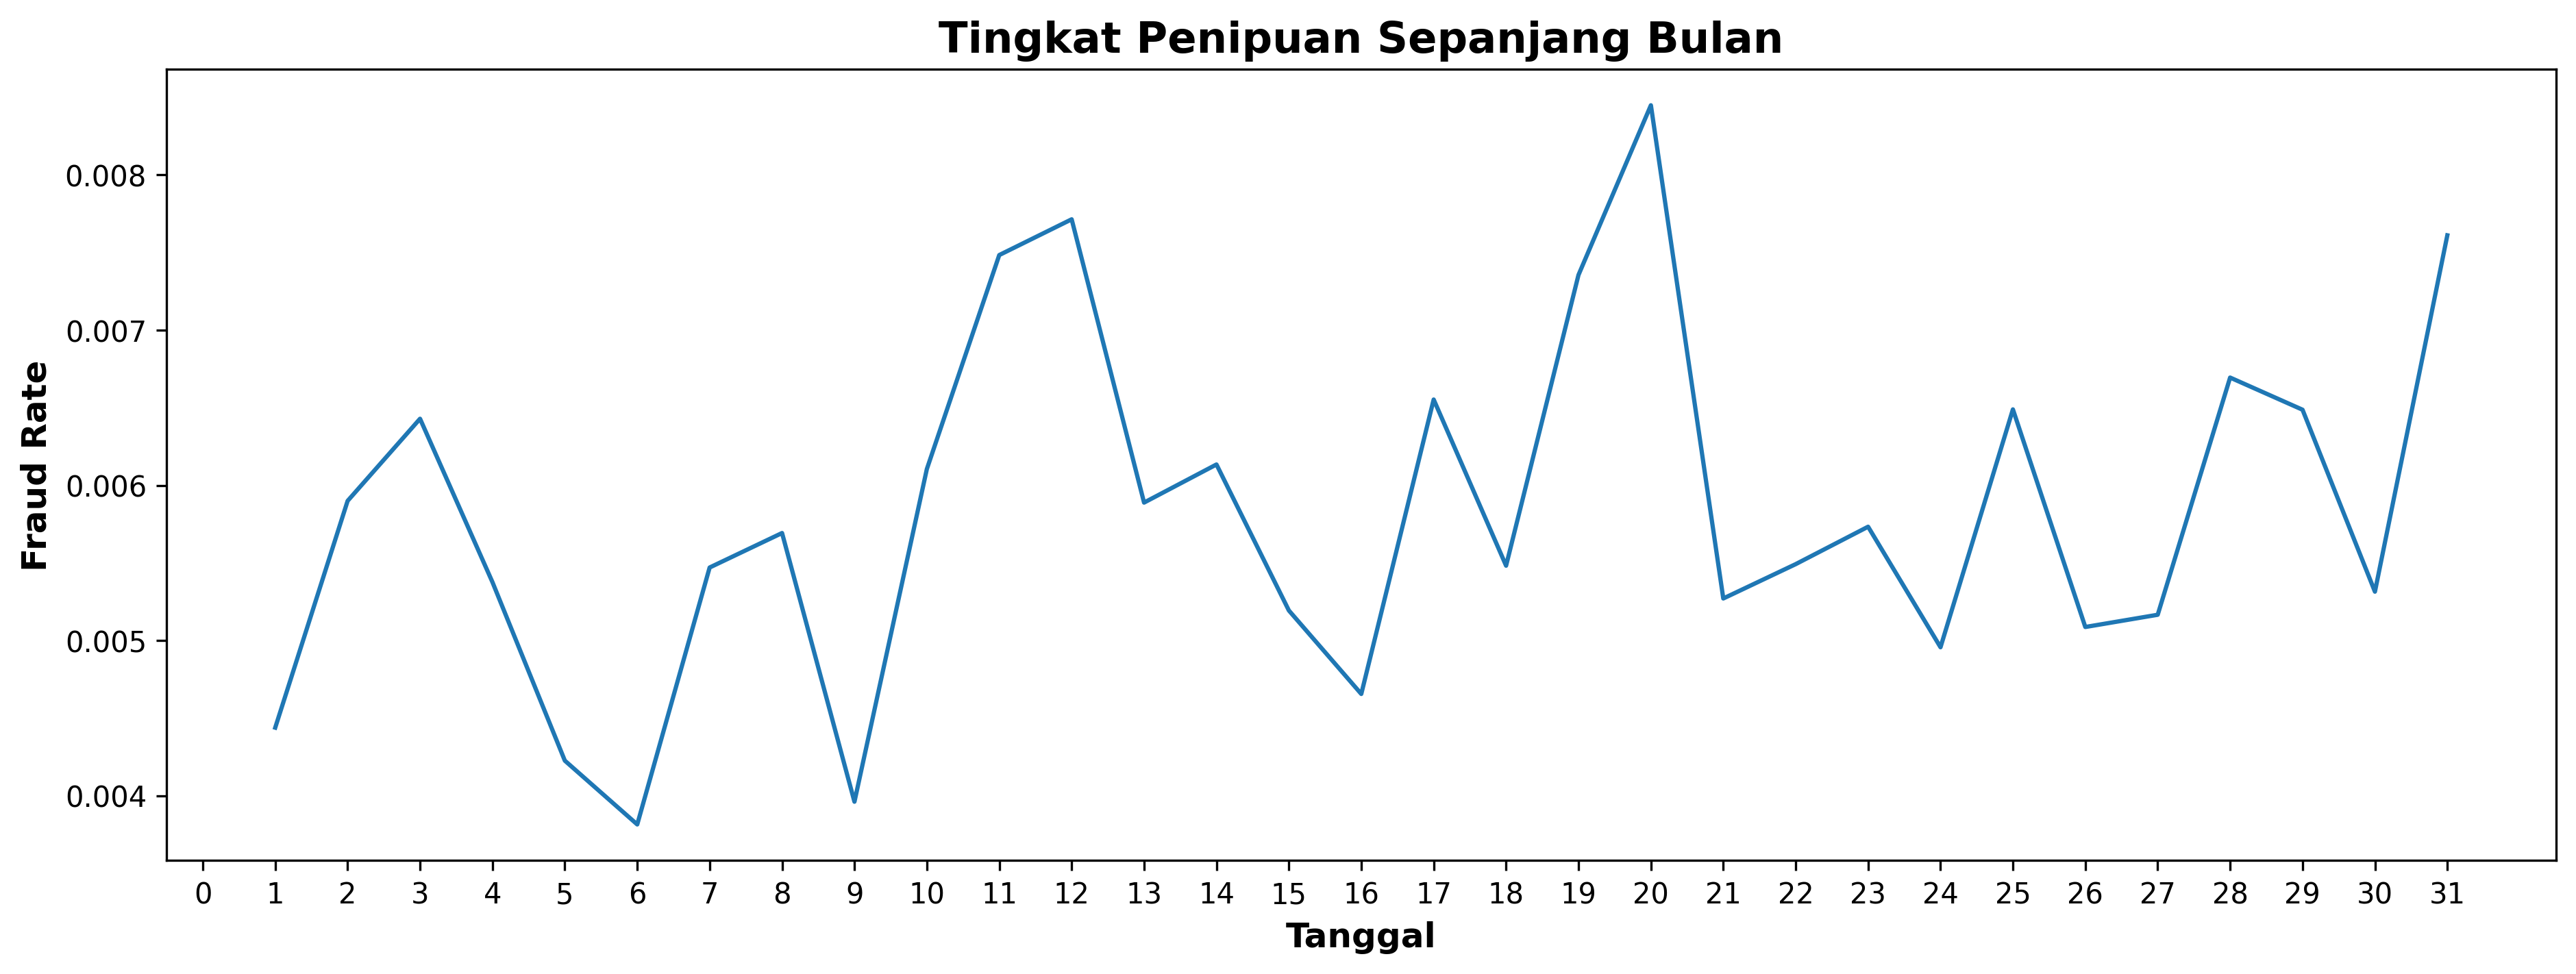

In [25]:
# Mengatur ukuran plot
plt.figure(figsize = (15, 5), dpi = 300)

# Memeriksa bagaimana tingkat penipuan berubah sepanjang bulan
sns.lineplot(
    data = fraud_df_month,
    x = "transaction_date",
    y = "fraud_rate",
)

# Menambahkan judul dan label ke plot
plt.title("Tingkat Penipuan Sepanjang Bulan")
plt.xlabel("Tanggal")
plt.ylabel("Fraud Rate")

# Mengubah nilai xtick
plt.xticks(range(0, 32));

In [26]:
# Menyaring transaksi penipuan dan mengelompokkannya berdasarkan jam dalam sehari
fraud_df_hour = df.groupby("transaction_hour", as_index=False)["is_fraud"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Hitung tingkat penipuan
fraud_df_hour["fraud_rate"] = fraud_df_hour["fraudulent_transaction_count"] / fraud_df_hour["total_transaction_count"]
fraud_df_hour

,transaction_hour,fraudulent_transaction_count,total_transaction_count,fraud_rate
0,0,635,42502,0.014940
1,1,658,42869,0.015349
2,2,625,42656,0.014652
3,3,609,42769,0.014239
4,4,46,41863,0.001099
5,5,60,42171,0.001423
6,6,40,42300,0.000946
7,7,56,42203,0.001327
8,8,49,42505,0.001153
9,9,47,42185,0.001114


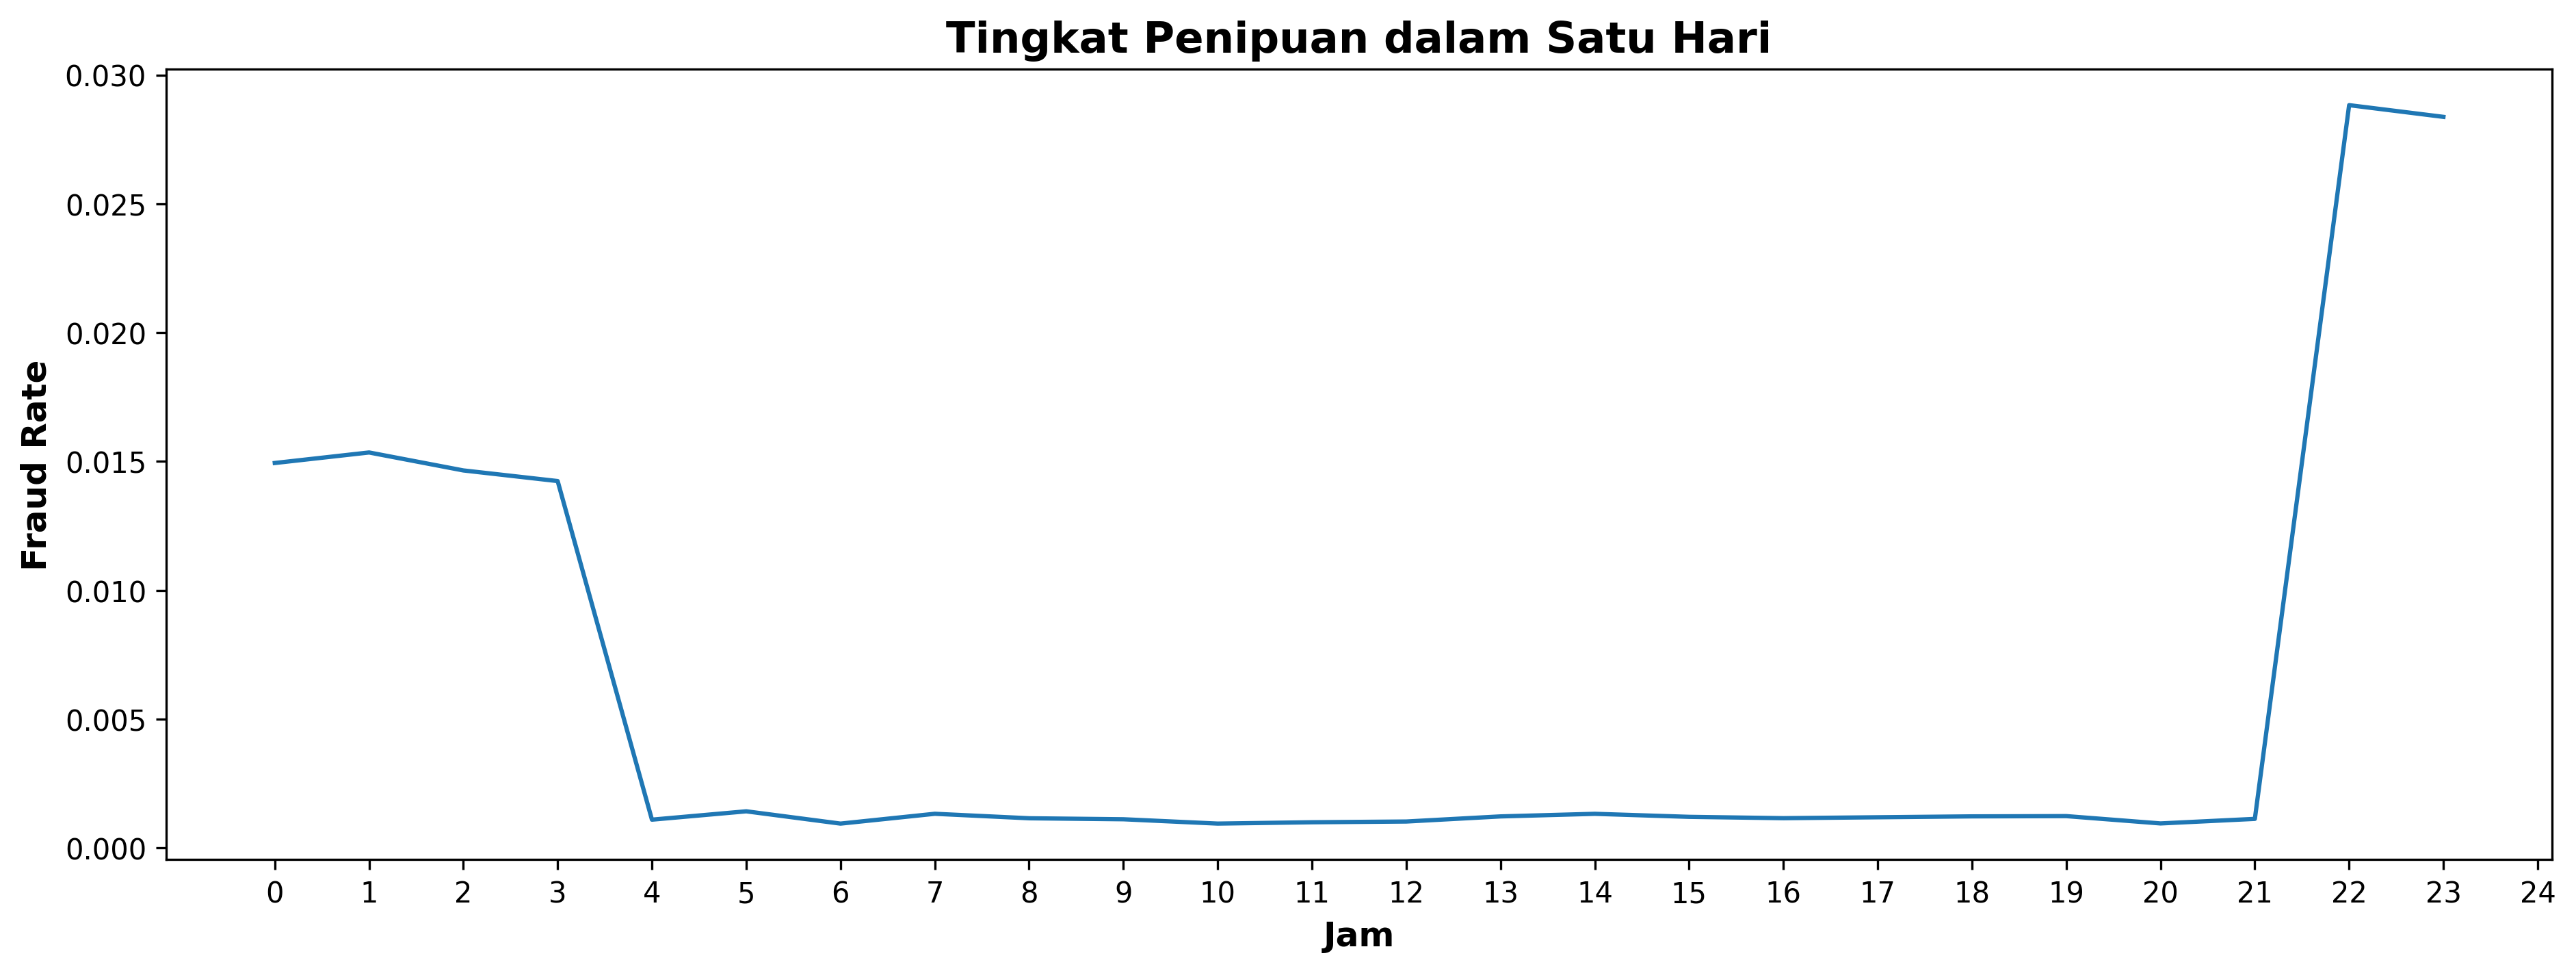

In [27]:
# Mengatur ukuran plot
plt.figure(figsize = (15, 5), dpi = 300)

# Memeriksa bagaimana tingkat penipuan berubah sepanjang hari
sns.lineplot(
    data = fraud_df_hour,
    x = "transaction_hour",
    y = "fraud_rate",
)

# Menambahkan judul dan label ke plot
plt.title("Tingkat Penipuan dalam Satu Hari")
plt.xlabel("Jam")
plt.ylabel("Fraud Rate")

# Mengubah nilai xtick
plt.xticks(range(0, 25));

In [28]:
# Menyaring transaksi penipuan dan mengelompokkannya berdasarkan jam dalam sehari
fraud_df_min = df.groupby("transaction_min", as_index=False)["is_fraud"].agg(
    fraudulent_transaction_count = "sum",
    total_transaction_count = "count"
)

# Hitung tingkat penipuan
fraud_df_min["fraud_rate"] = fraud_df_min["fraudulent_transaction_count"] / fraud_df_min["total_transaction_count"]
fraud_df_min

,transaction_min,fraudulent_transaction_count,total_transaction_count,fraud_rate
0,0,128,21372,0.005989
1,1,107,21867,0.004893
2,2,138,21718,0.006354
3,3,113,21797,0.005184
4,4,120,21748,0.005518
5,5,133,21505,0.006185
6,6,117,21490,0.005444
7,7,113,21827,0.005177
8,8,112,21586,0.005189
9,9,127,21512,0.005904


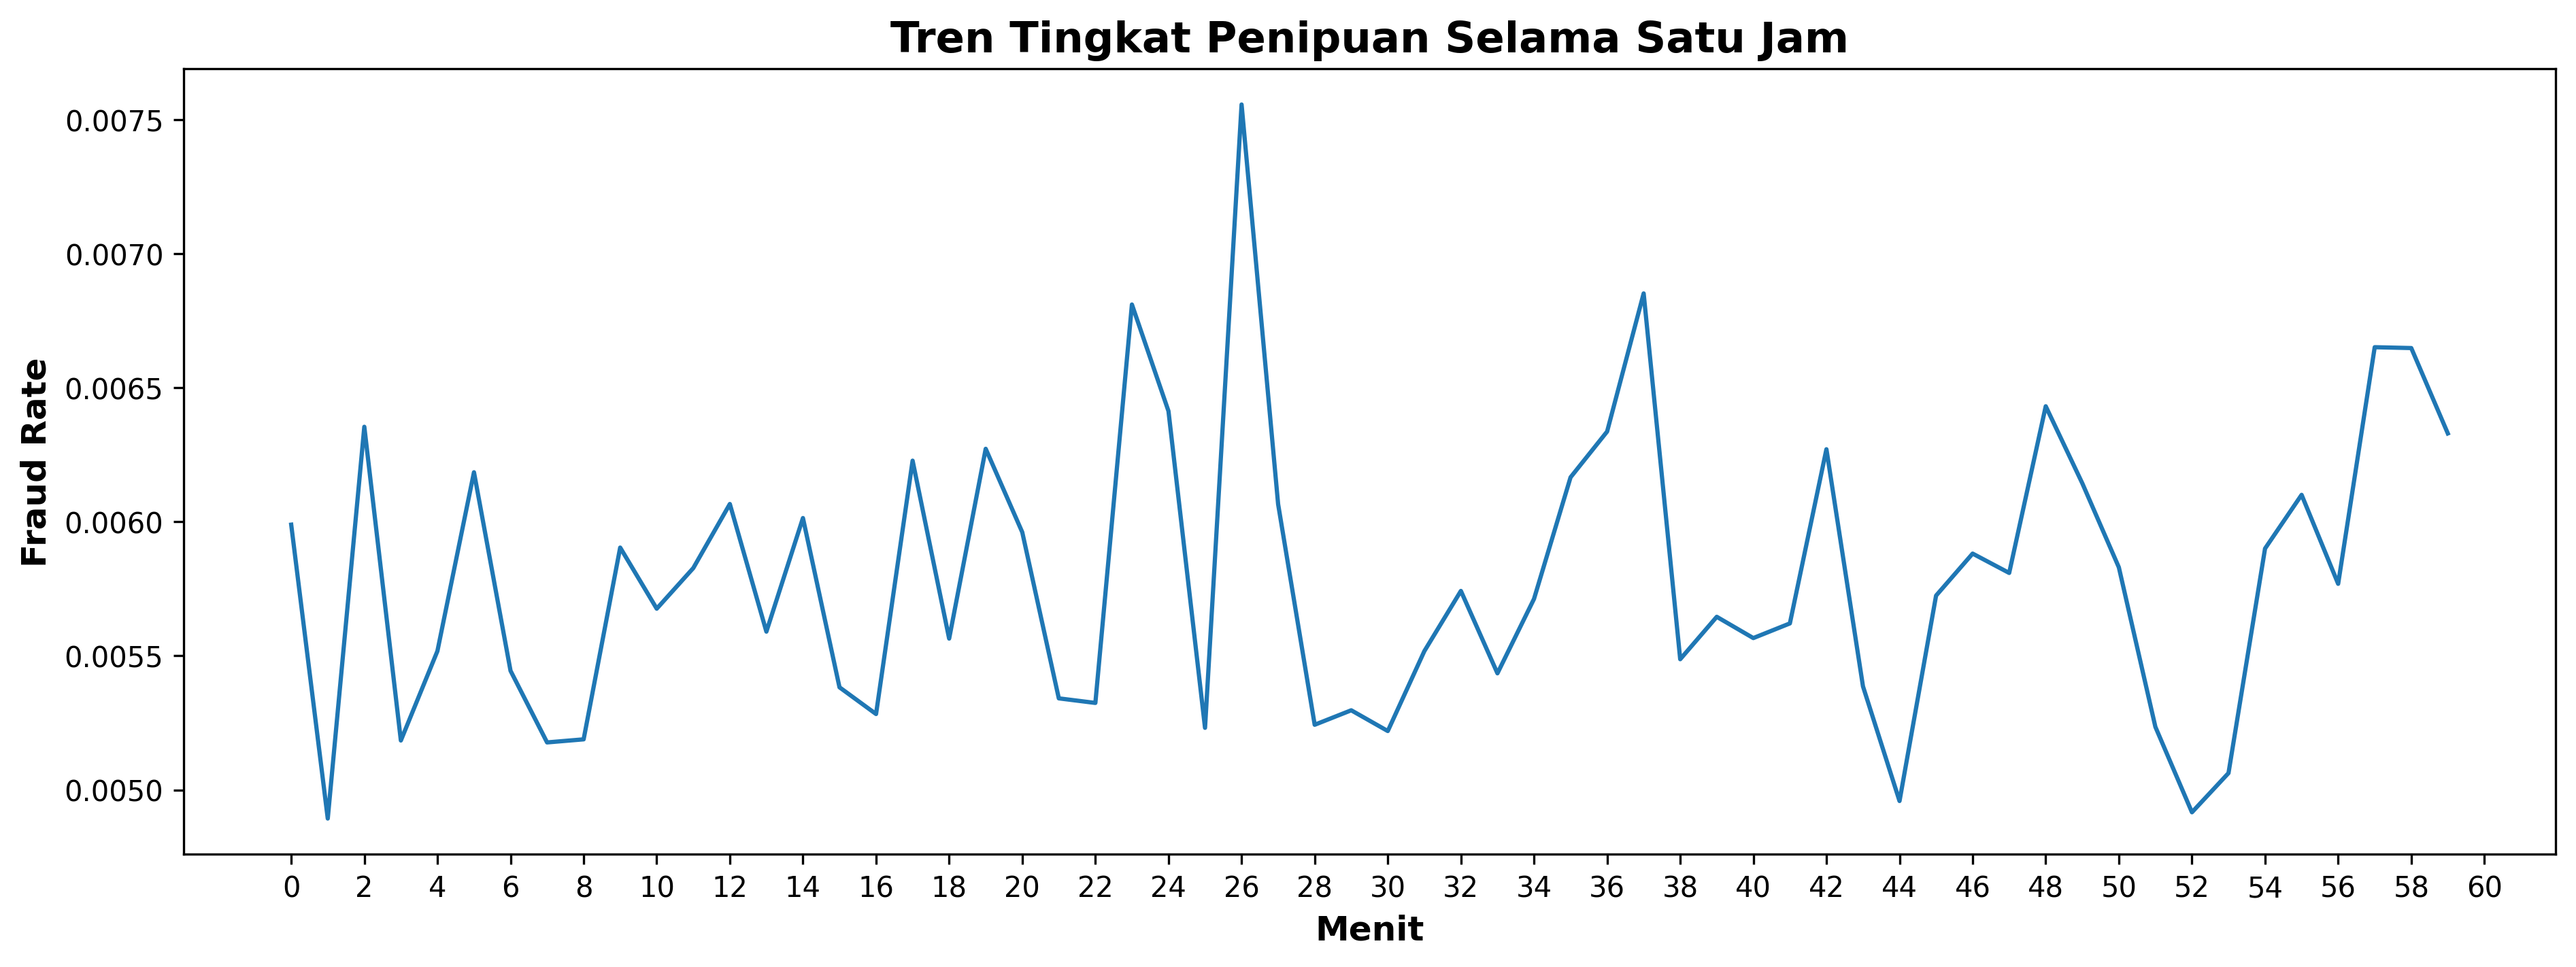

In [29]:
# Mengatur ukuran plot
plt.figure(figsize = (15, 5), dpi = 300)

# Memeriksa bagaimana tingkat penipuan berubah sepanjang satu jam
sns.lineplot(
    data = fraud_df_min,
    x = "transaction_min",
    y = "fraud_rate",
)

# Menambahkan judul dan label ke plot
plt.title("Tren Tingkat Penipuan Selama Satu Jam")
plt.xlabel("Menit")
plt.ylabel("Fraud Rate")

# Mengubah nilai xtick
plt.xticks(range(0, 61, 2));

In [30]:
# Mengubah kolom kategori: ganti garis bawah dengan spasi dan gunakan huruf kapital
df['category'] = df['category'].str.replace('_', ' ').str.title()

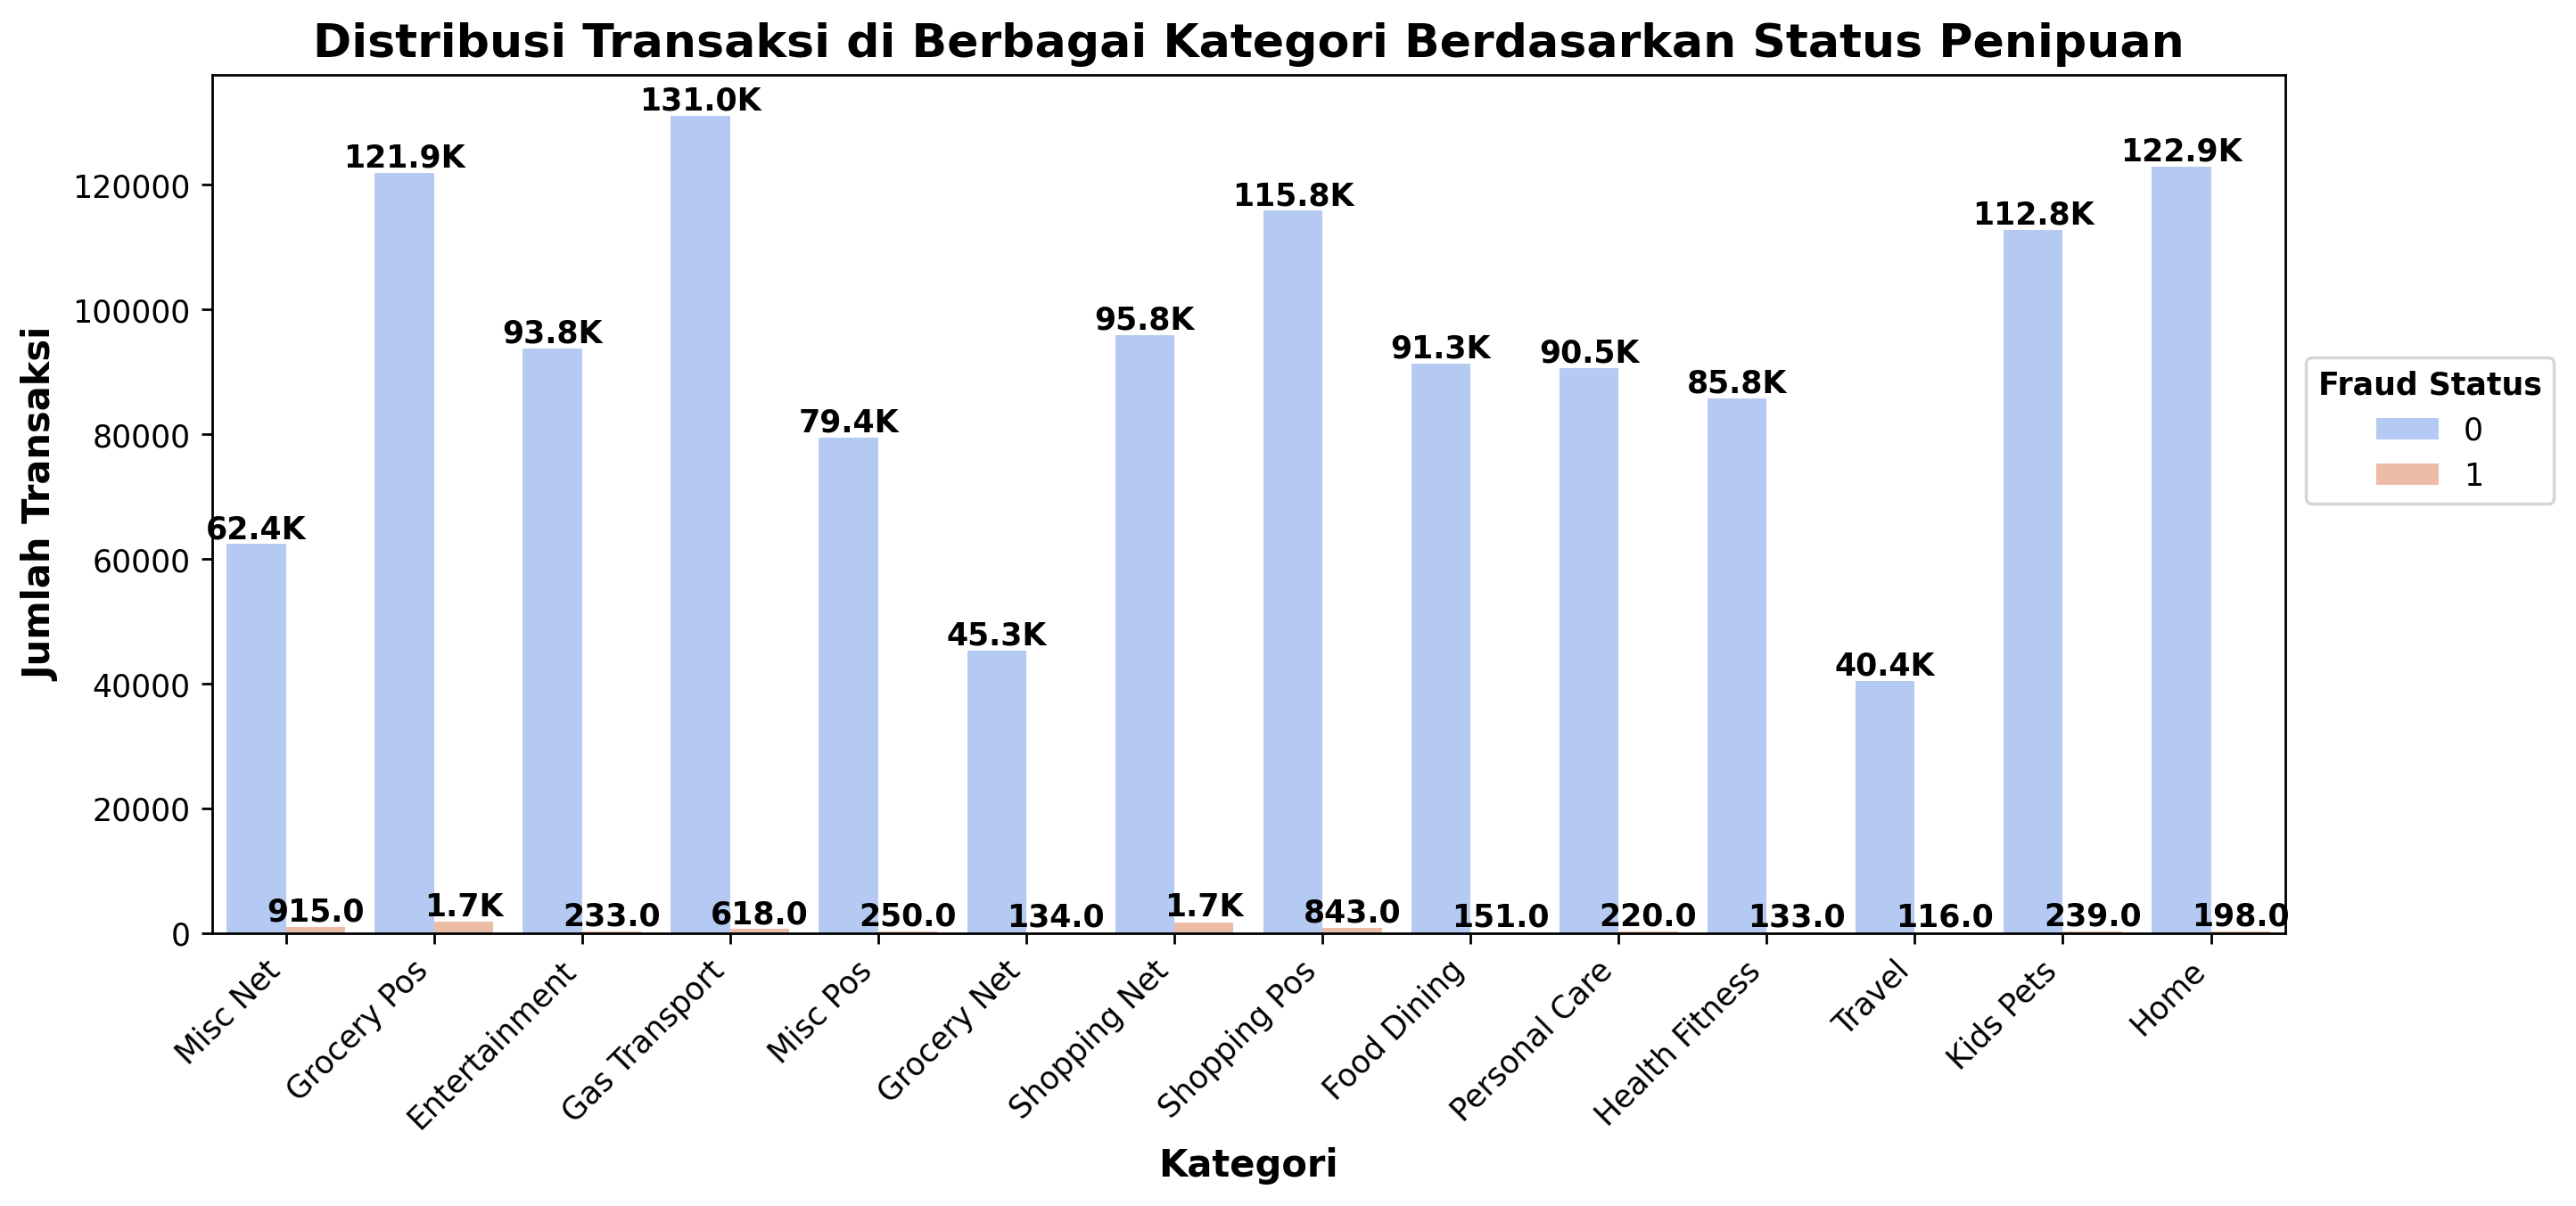

In [31]:
# Memeriksa distribusi transaksi di berbagai kategori merchant berdasarkan status penipuan
ax = sns.countplot(
    data = df,
    x = "category",
    hue = "is_fraud",
    palette = 'coolwarm'
)

# Membuat anotasi pada batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Transaksi di Berbagai Kategori Berdasarkan Status Penipuan")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Transaksi")

plt.xticks(rotation=45, ha='right')

# Mengatur lokasi
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

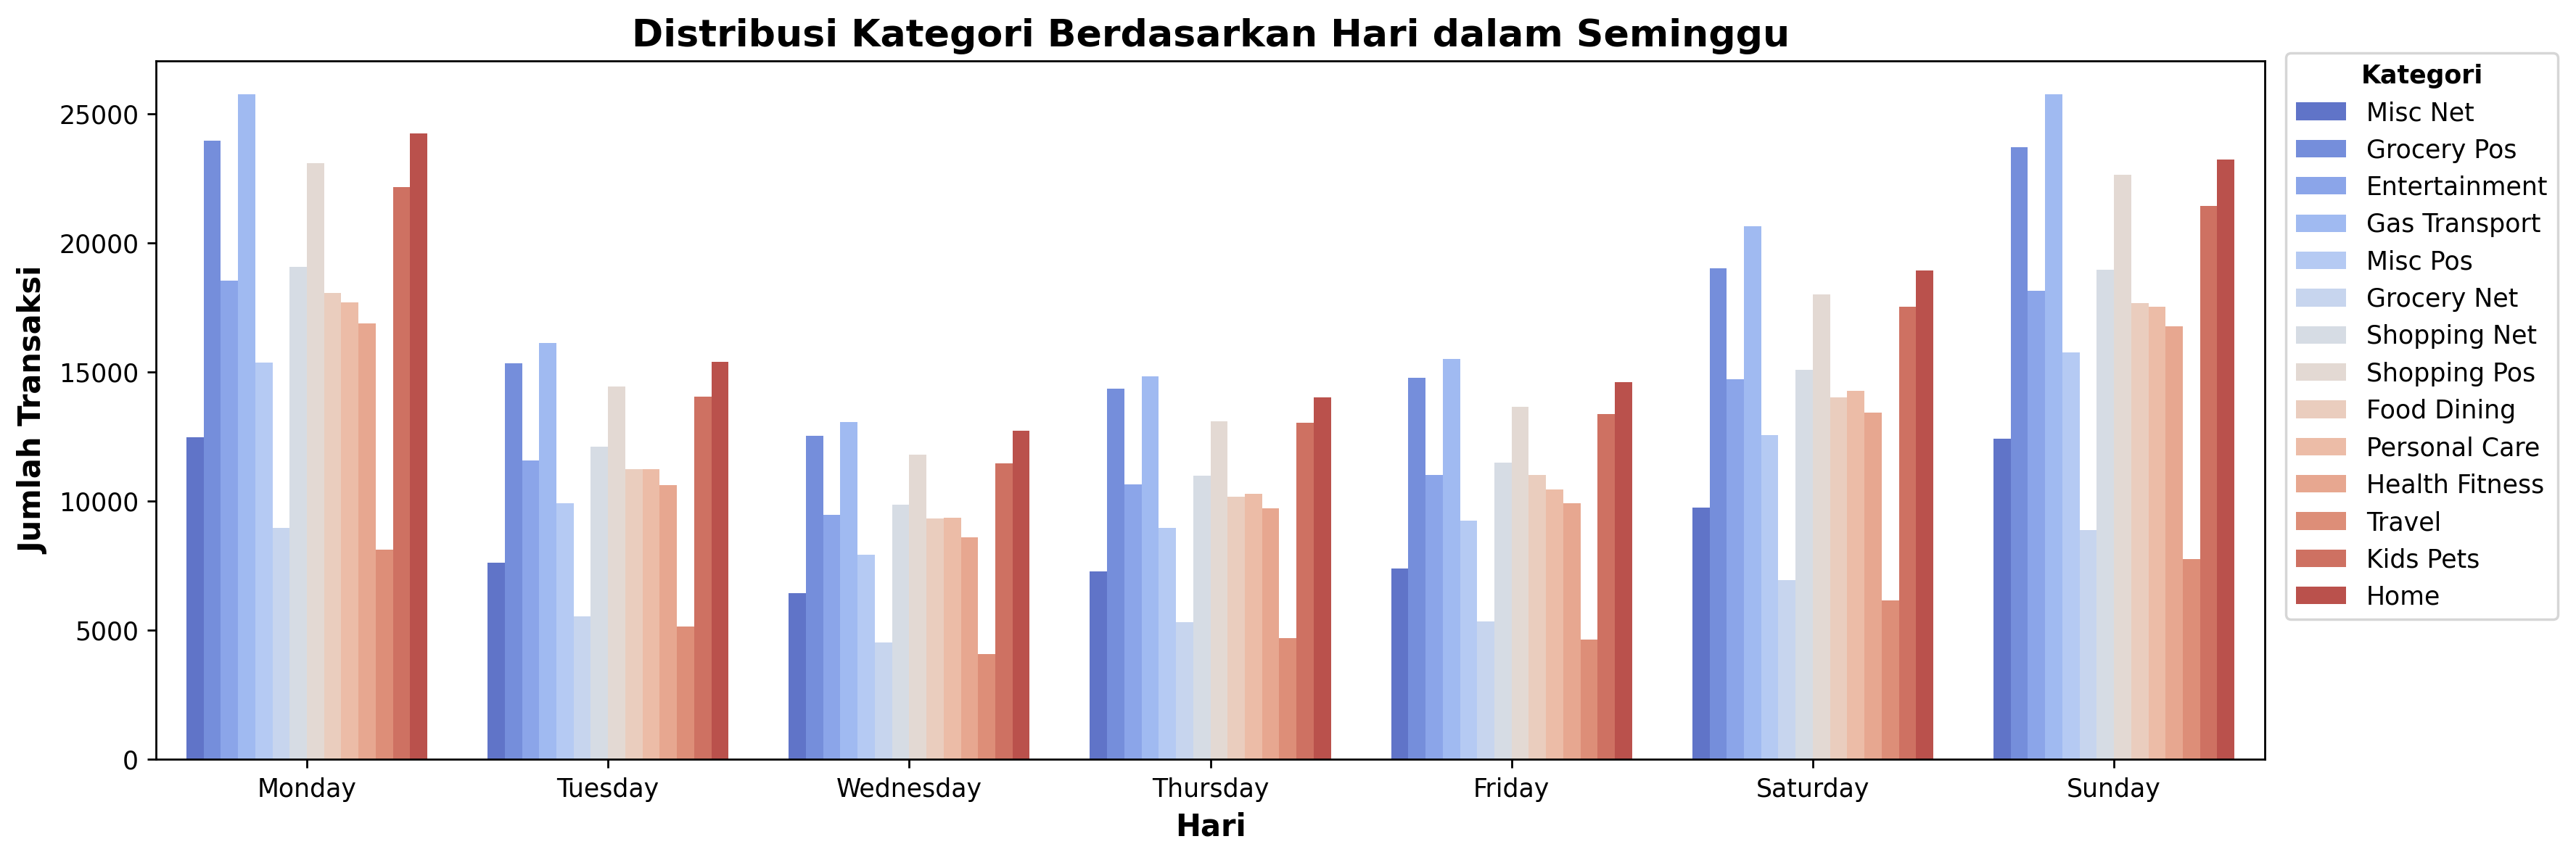

In [32]:
# Mengatur ukuran plot
plt.figure(figsize = (15, 5))

# Memeriksa bagaimana kategori bervariasi pada hari-hari yang berbeda dalam seminggu
ax = sns.countplot(
    data = df,
    x = "day_of_week",
    hue = "category",
    palette = "coolwarm",
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Kategori Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")

# Mengatur lokasi legenda
plt.legend(title = "Kategori", title_fontproperties = {'weight':'bold'}, loc = (1.01, 0.2));

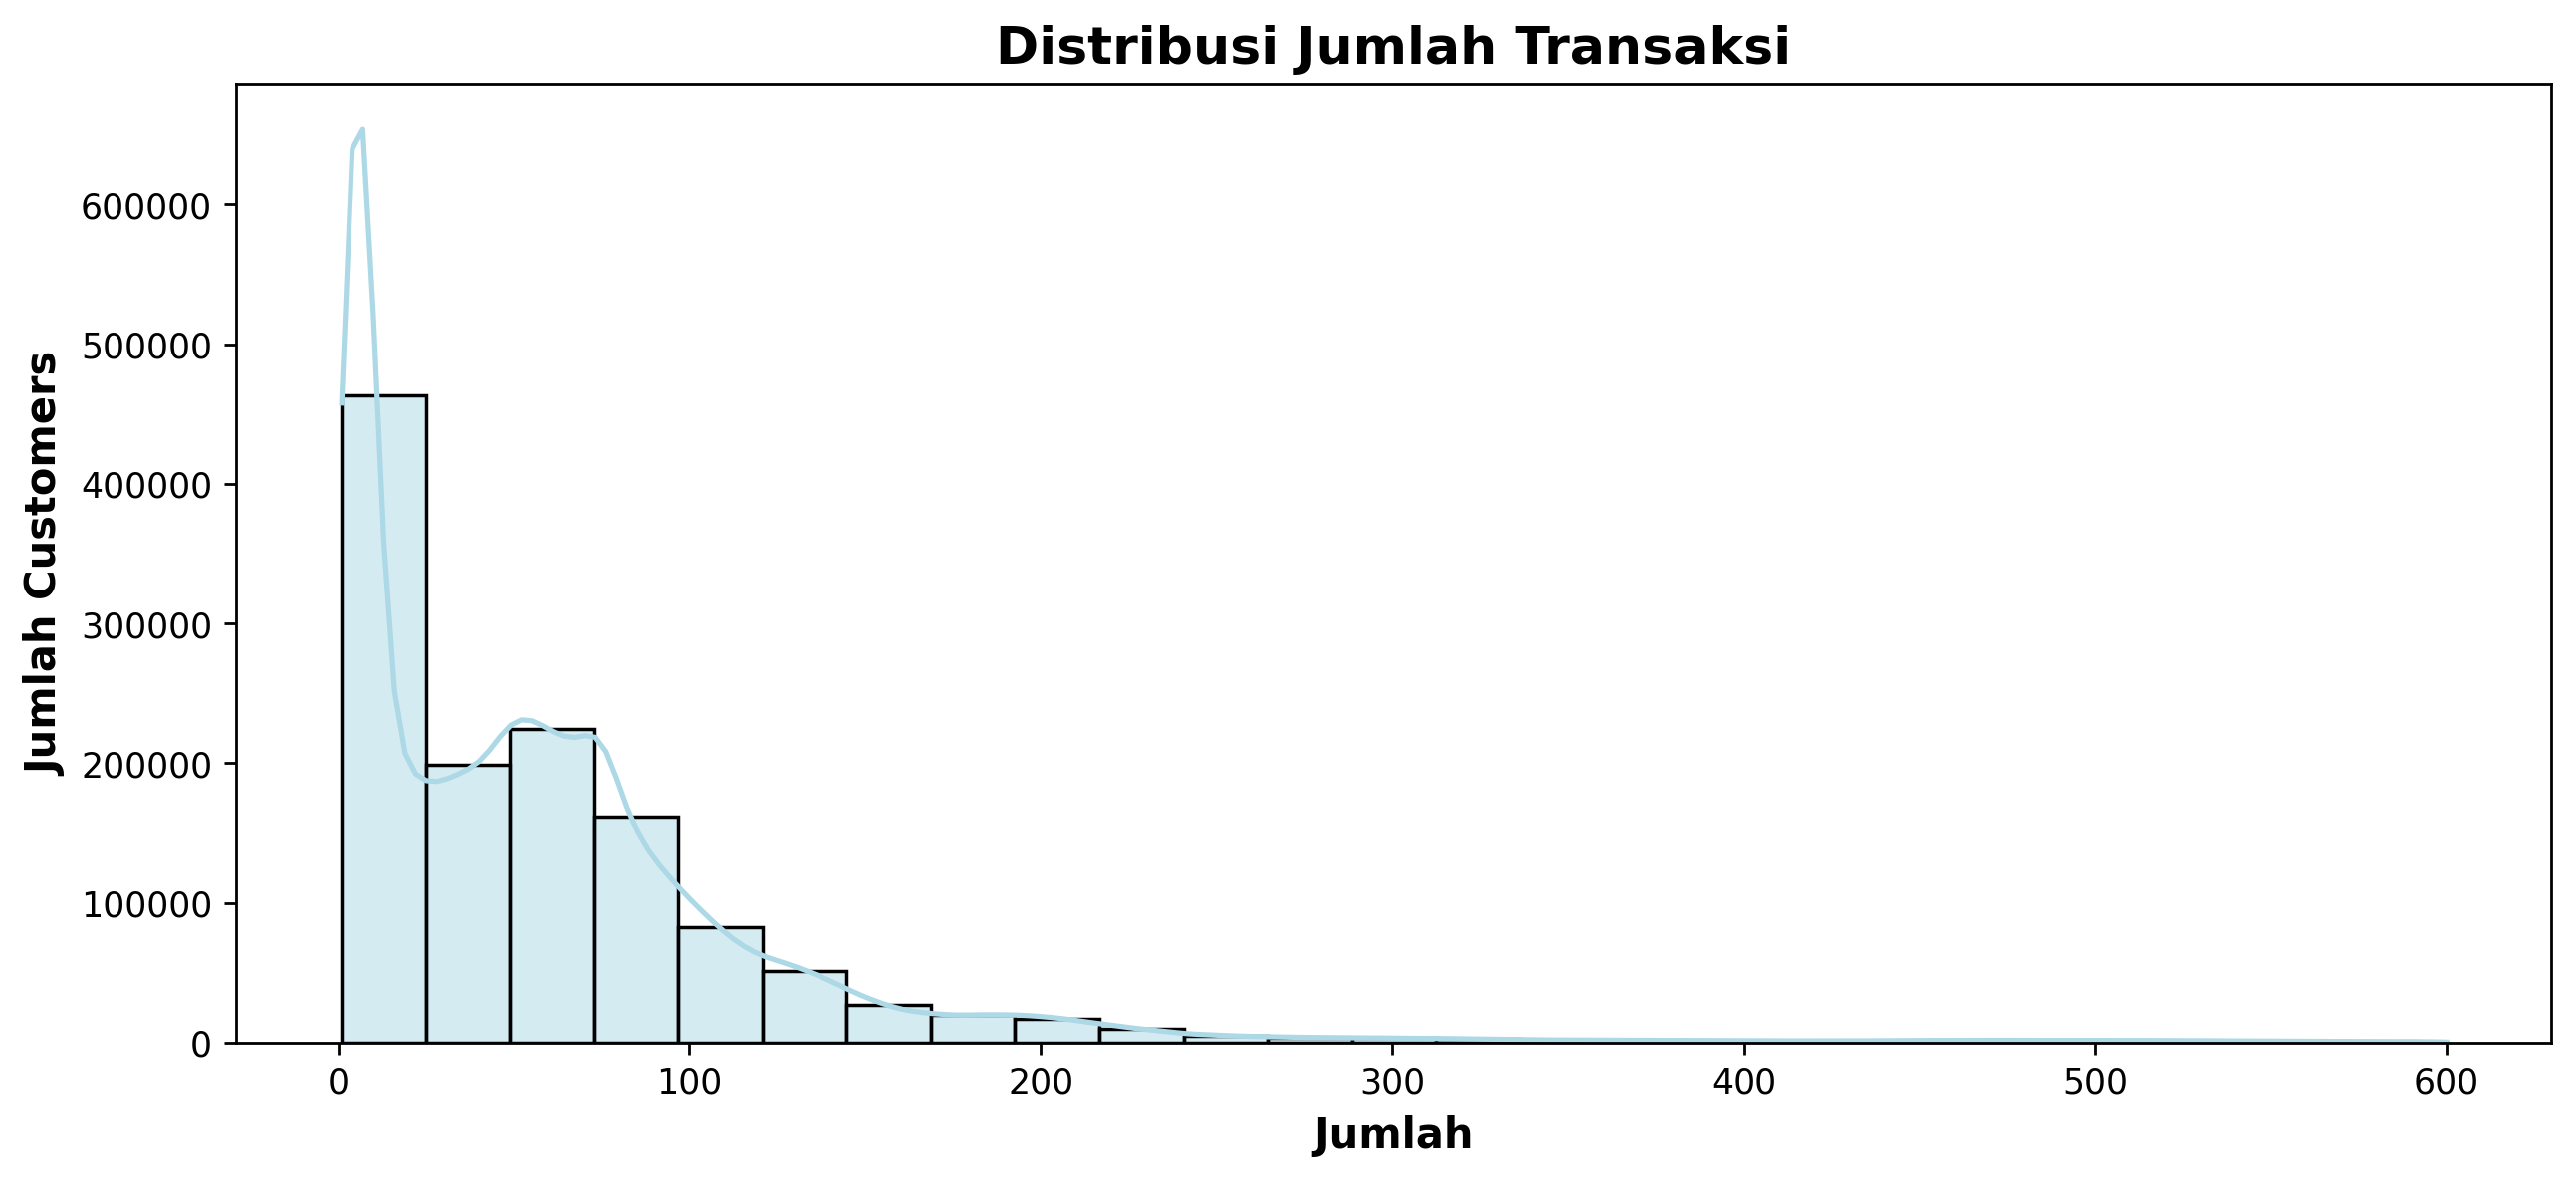

In [33]:
# Memeriksa distribusi jumlah transaksi
sns.histplot(
    data = df[df['amt'] < 600],
    x = "amt",
    bins = 25,
    kde = True,
    color = "lightblue",
    stat = "count"
)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Jumlah Transaksi")
plt.xlabel("Jumlah")
plt.ylabel("Jumlah Customers")

# Mengubah nilai Xtick
min_value = int(df['amt'].min())
max_value = int(df['amt'].max())

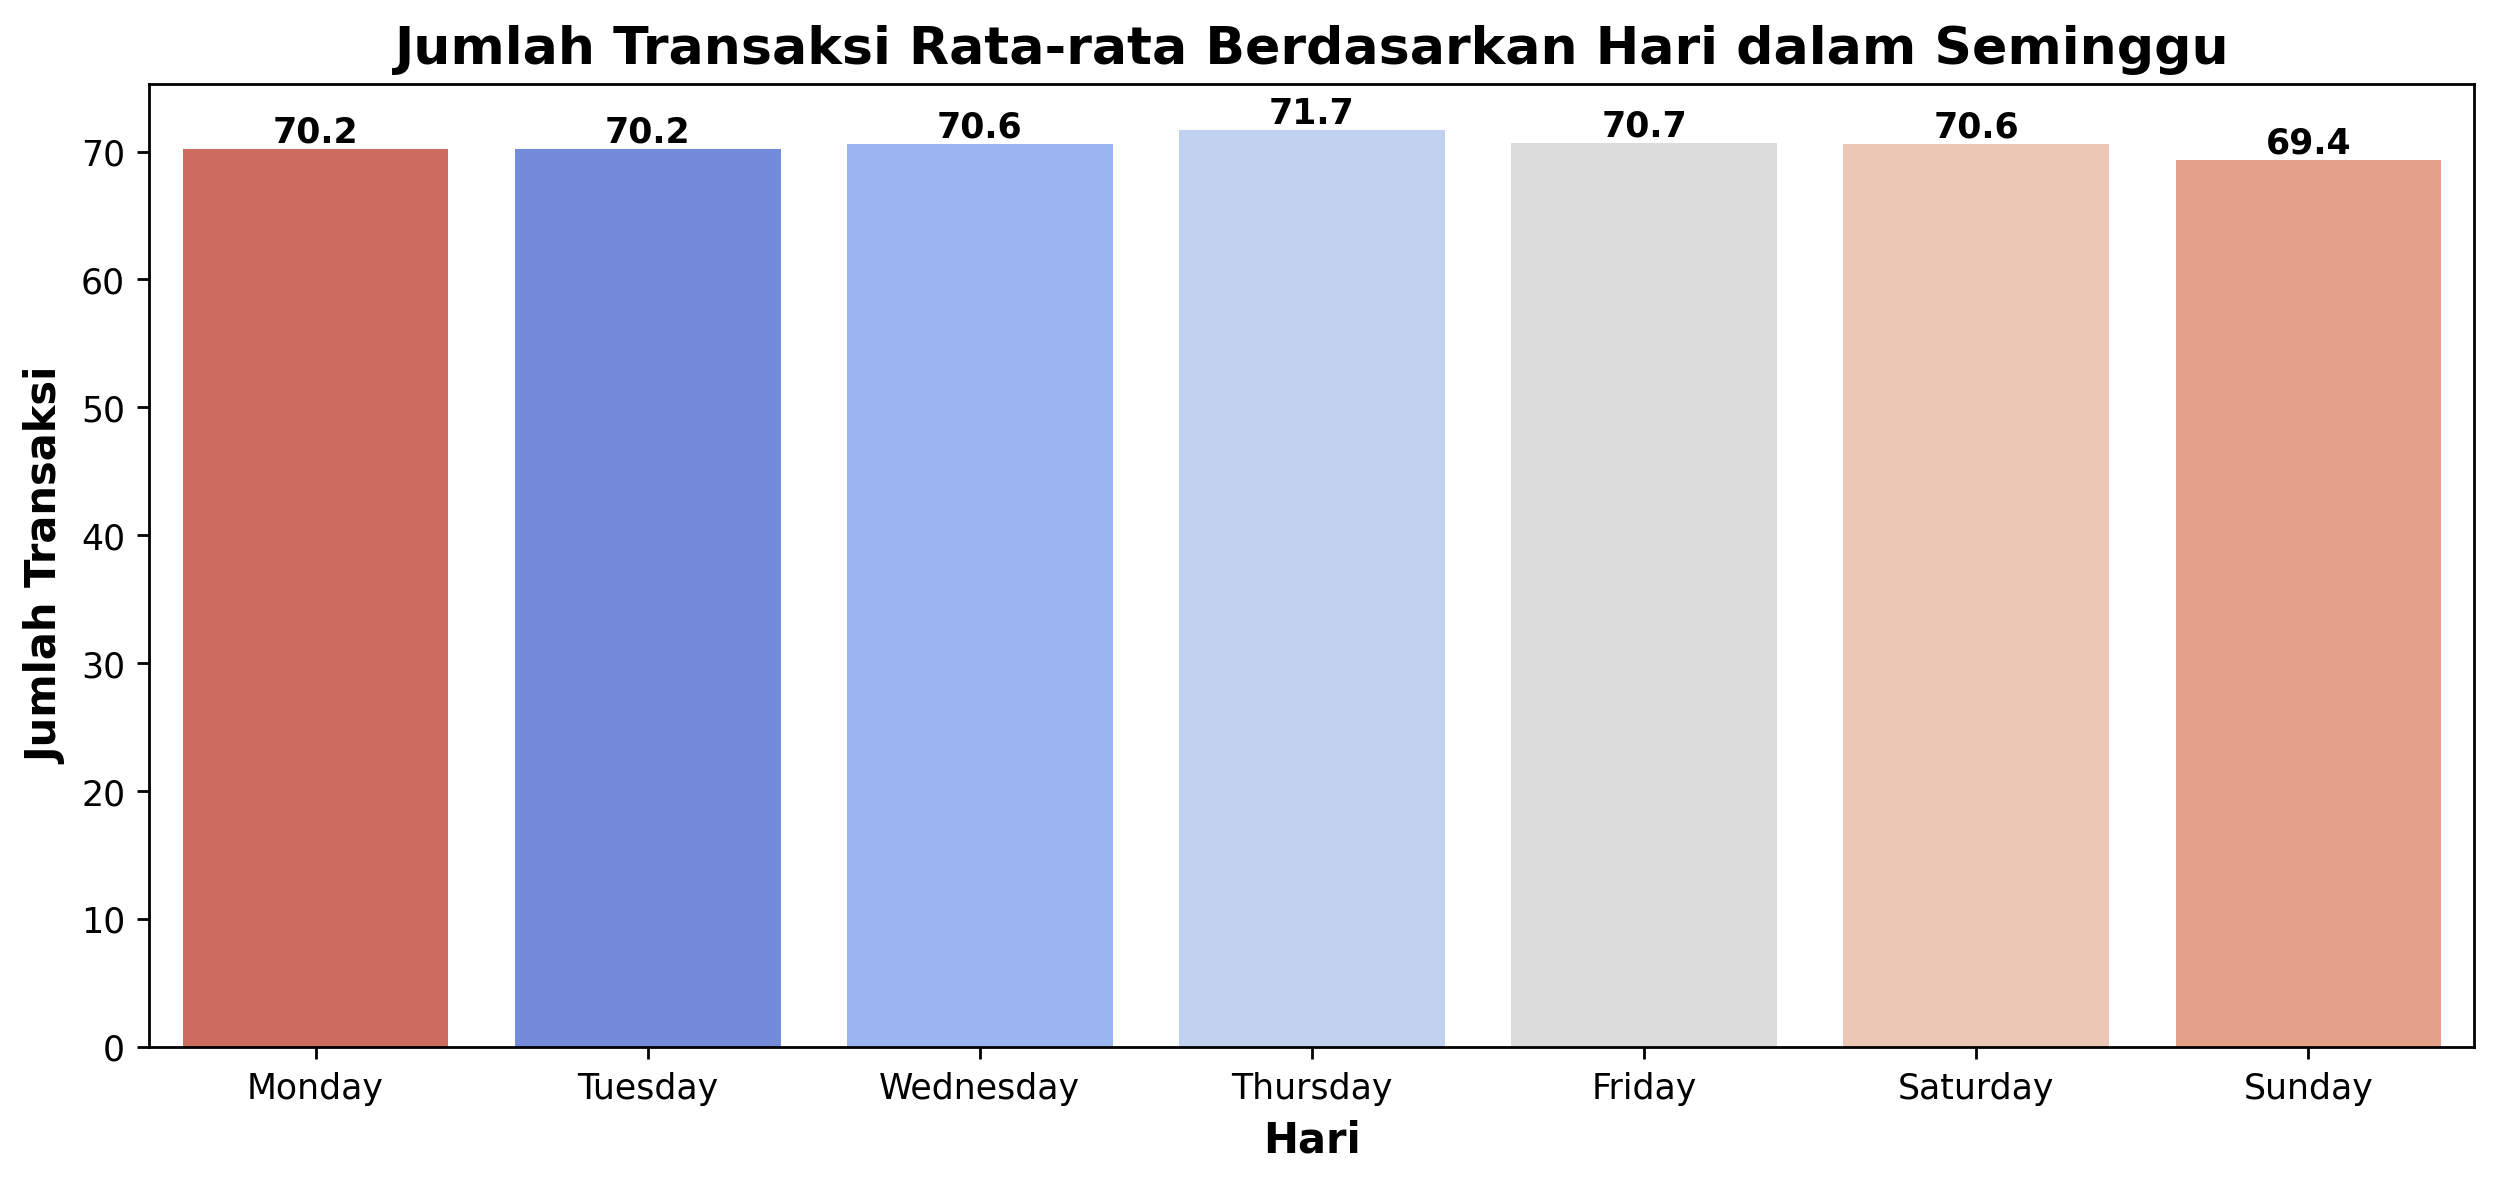

In [34]:
# Memeriksa bagaimana jumlah transaksi rata-rata bervariasi pada hari yang berbeda dalam seminggu
ax = sns.barplot(
    data = df,
    x = "day_of_week",
    y = "amt",
    hue = "day_of_week",
    palette = "coolwarm",
    order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
    dodge = False,
    errorbar = None
)

# Membuat anotasi pada batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Jumlah Transaksi Rata-rata Berdasarkan Hari dalam Seminggu")
plt.xlabel("Hari")
plt.ylabel("Jumlah Transaksi")
plt.show()

In [35]:
# Mengubah kolom jenis kelamin: M -> Male, F -> Female
df['gender'] = df['gender'].map({'M': 'Male', 'F': 'Female'})

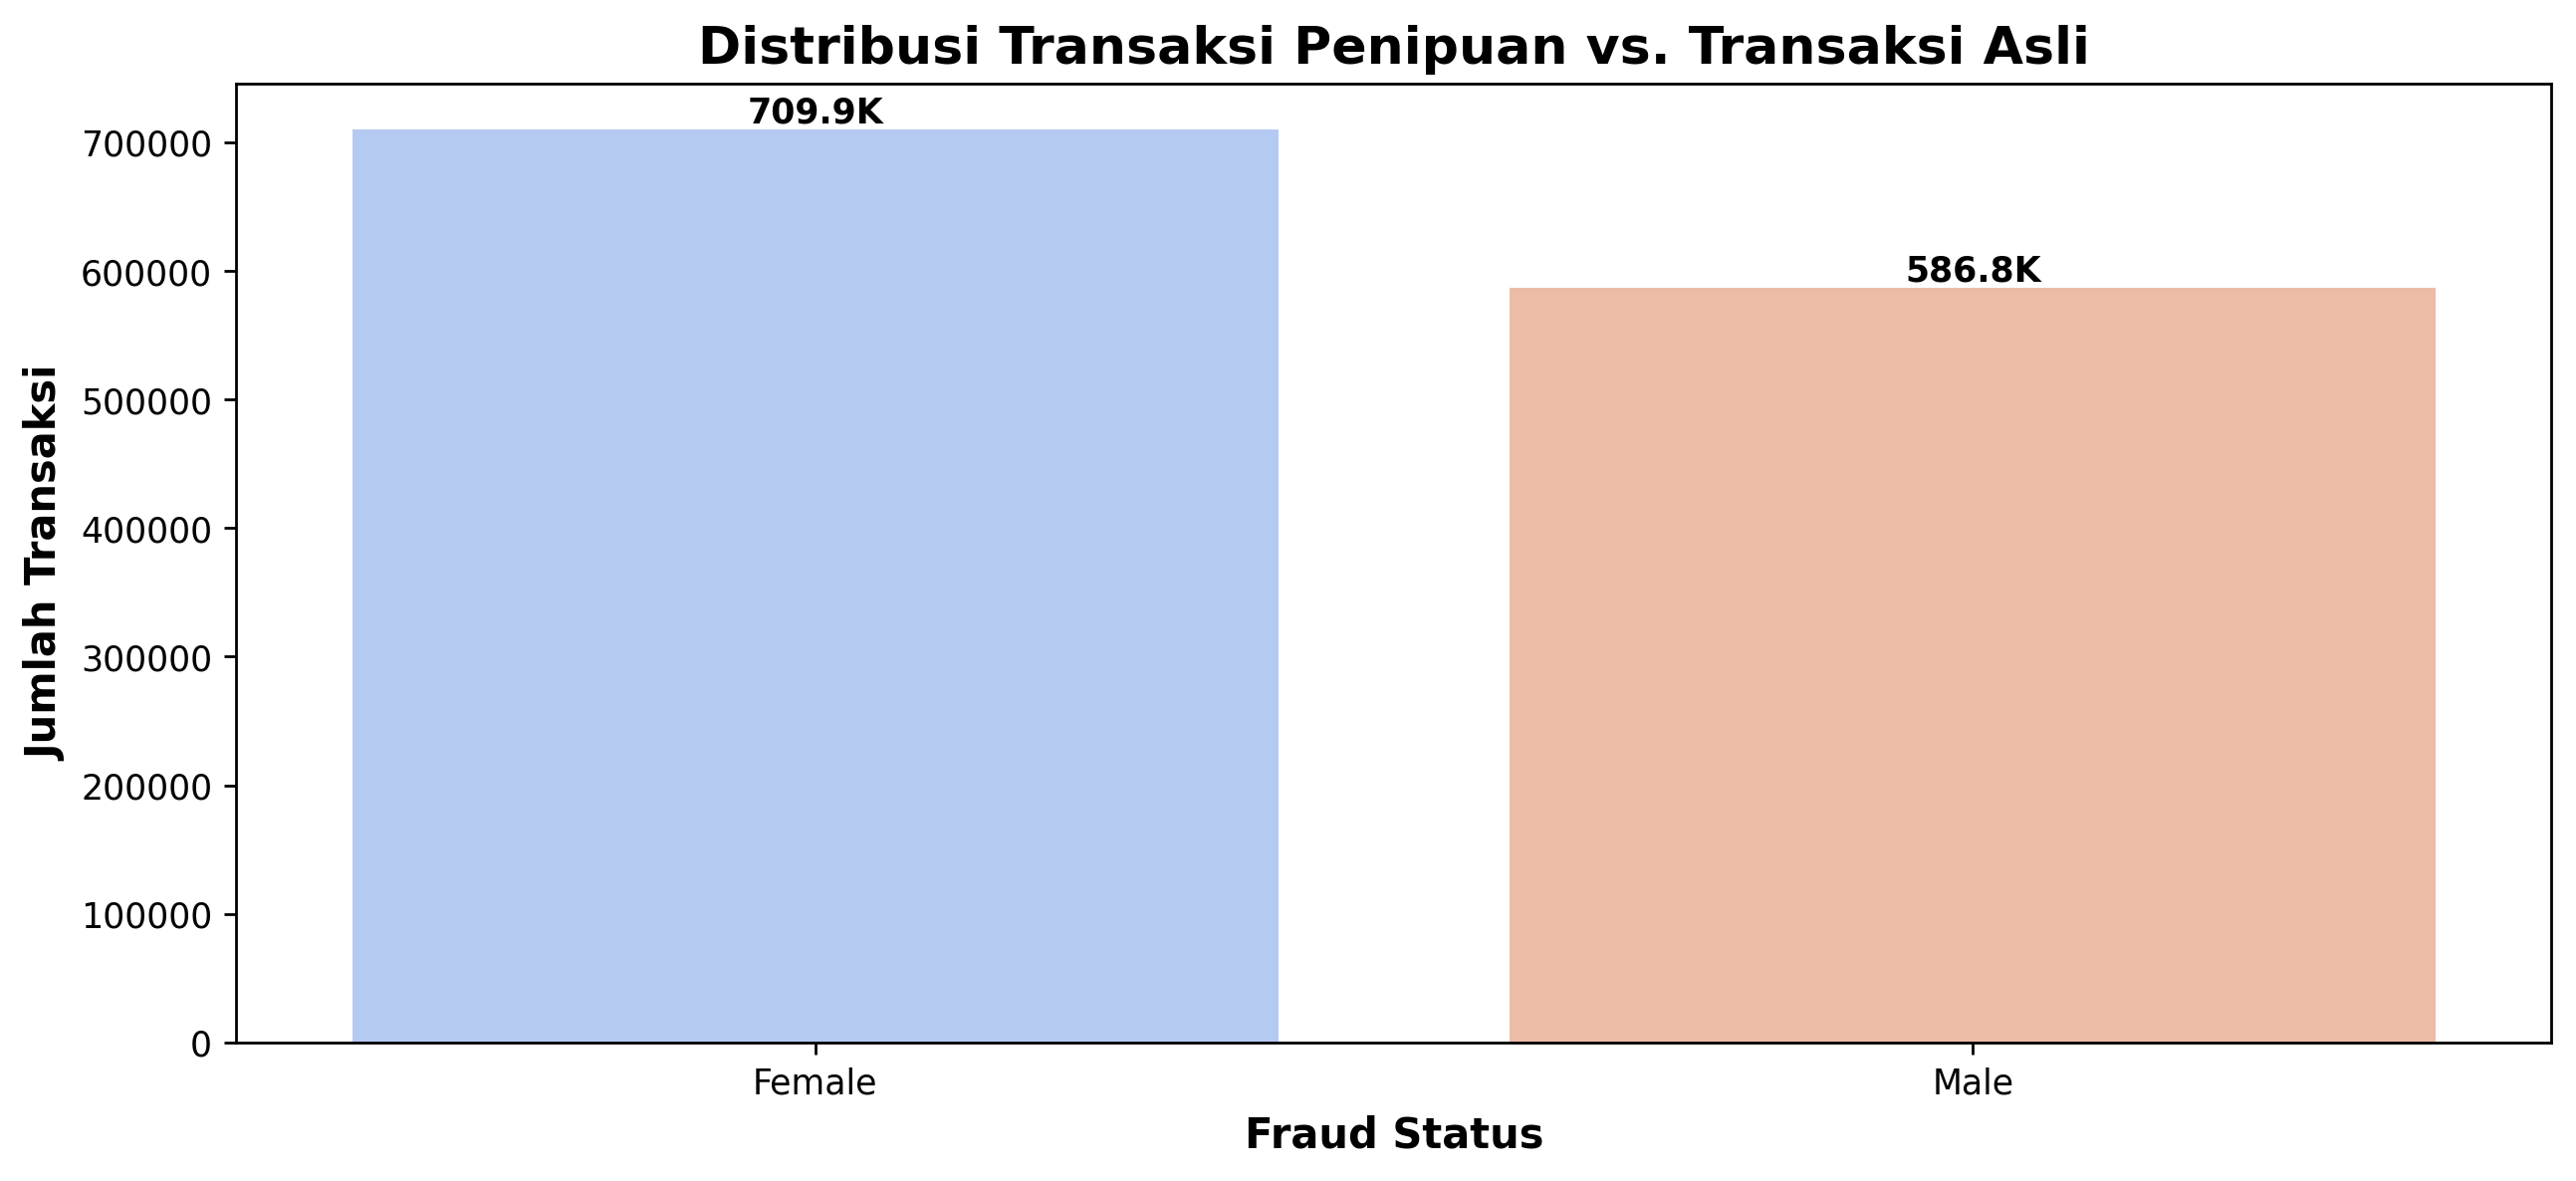

In [36]:
# Memeriksa jumlah transaksi penipuan dibandingkan dengan yang asli
ax = sns.countplot(
    data = df,
    x = "gender",
    hue = "gender",
    palette = 'coolwarm',
    dodge = False
)

# Membuat anotasi pada batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Transaksi Penipuan vs. Transaksi Asli")
plt.xlabel("Fraud Status")
plt.ylabel("Jumlah Transaksi")
plt.show()

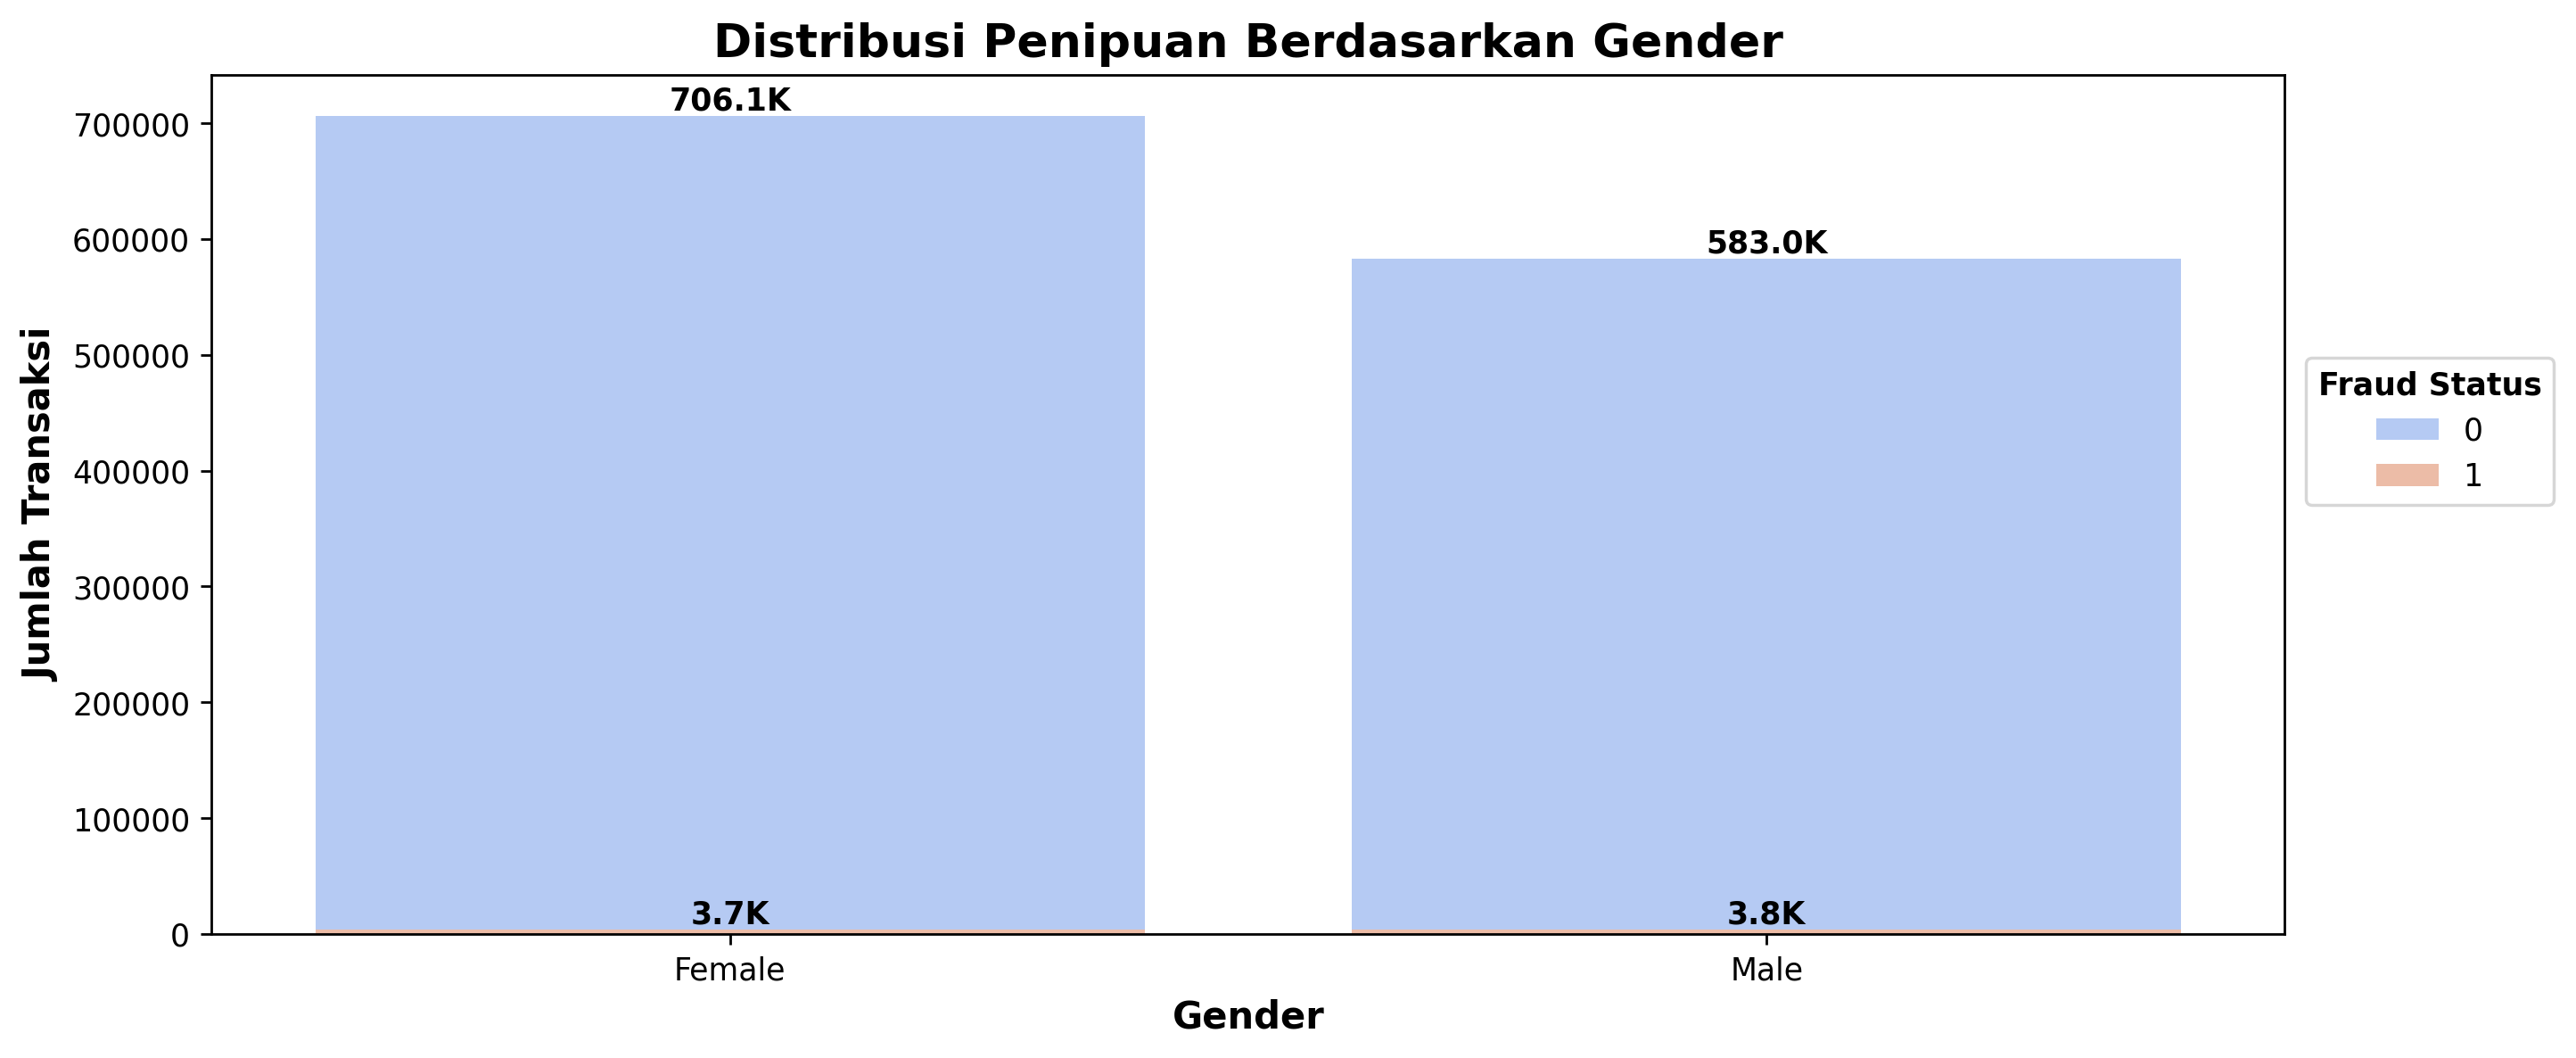

In [37]:
# Distribusi transaksi penipuan berdasarkan gender
ax = sns.countplot(
    data = df,
    x = "gender",
    hue = "is_fraud",
    palette = 'coolwarm',
    dodge = False
)

# Membuat anotasi pada batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Penipuan Berdasarkan Gender")
plt.xlabel("Gender")
plt.ylabel("Jumlah Transaksi")

# Mengatur lokasi
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

In [38]:
# Memfilter hanya transaksi yang merupakan fraud untuk 'street', 'city', 'state', 'zip'.
fraud_only = df[df['is_fraud'] == 1]

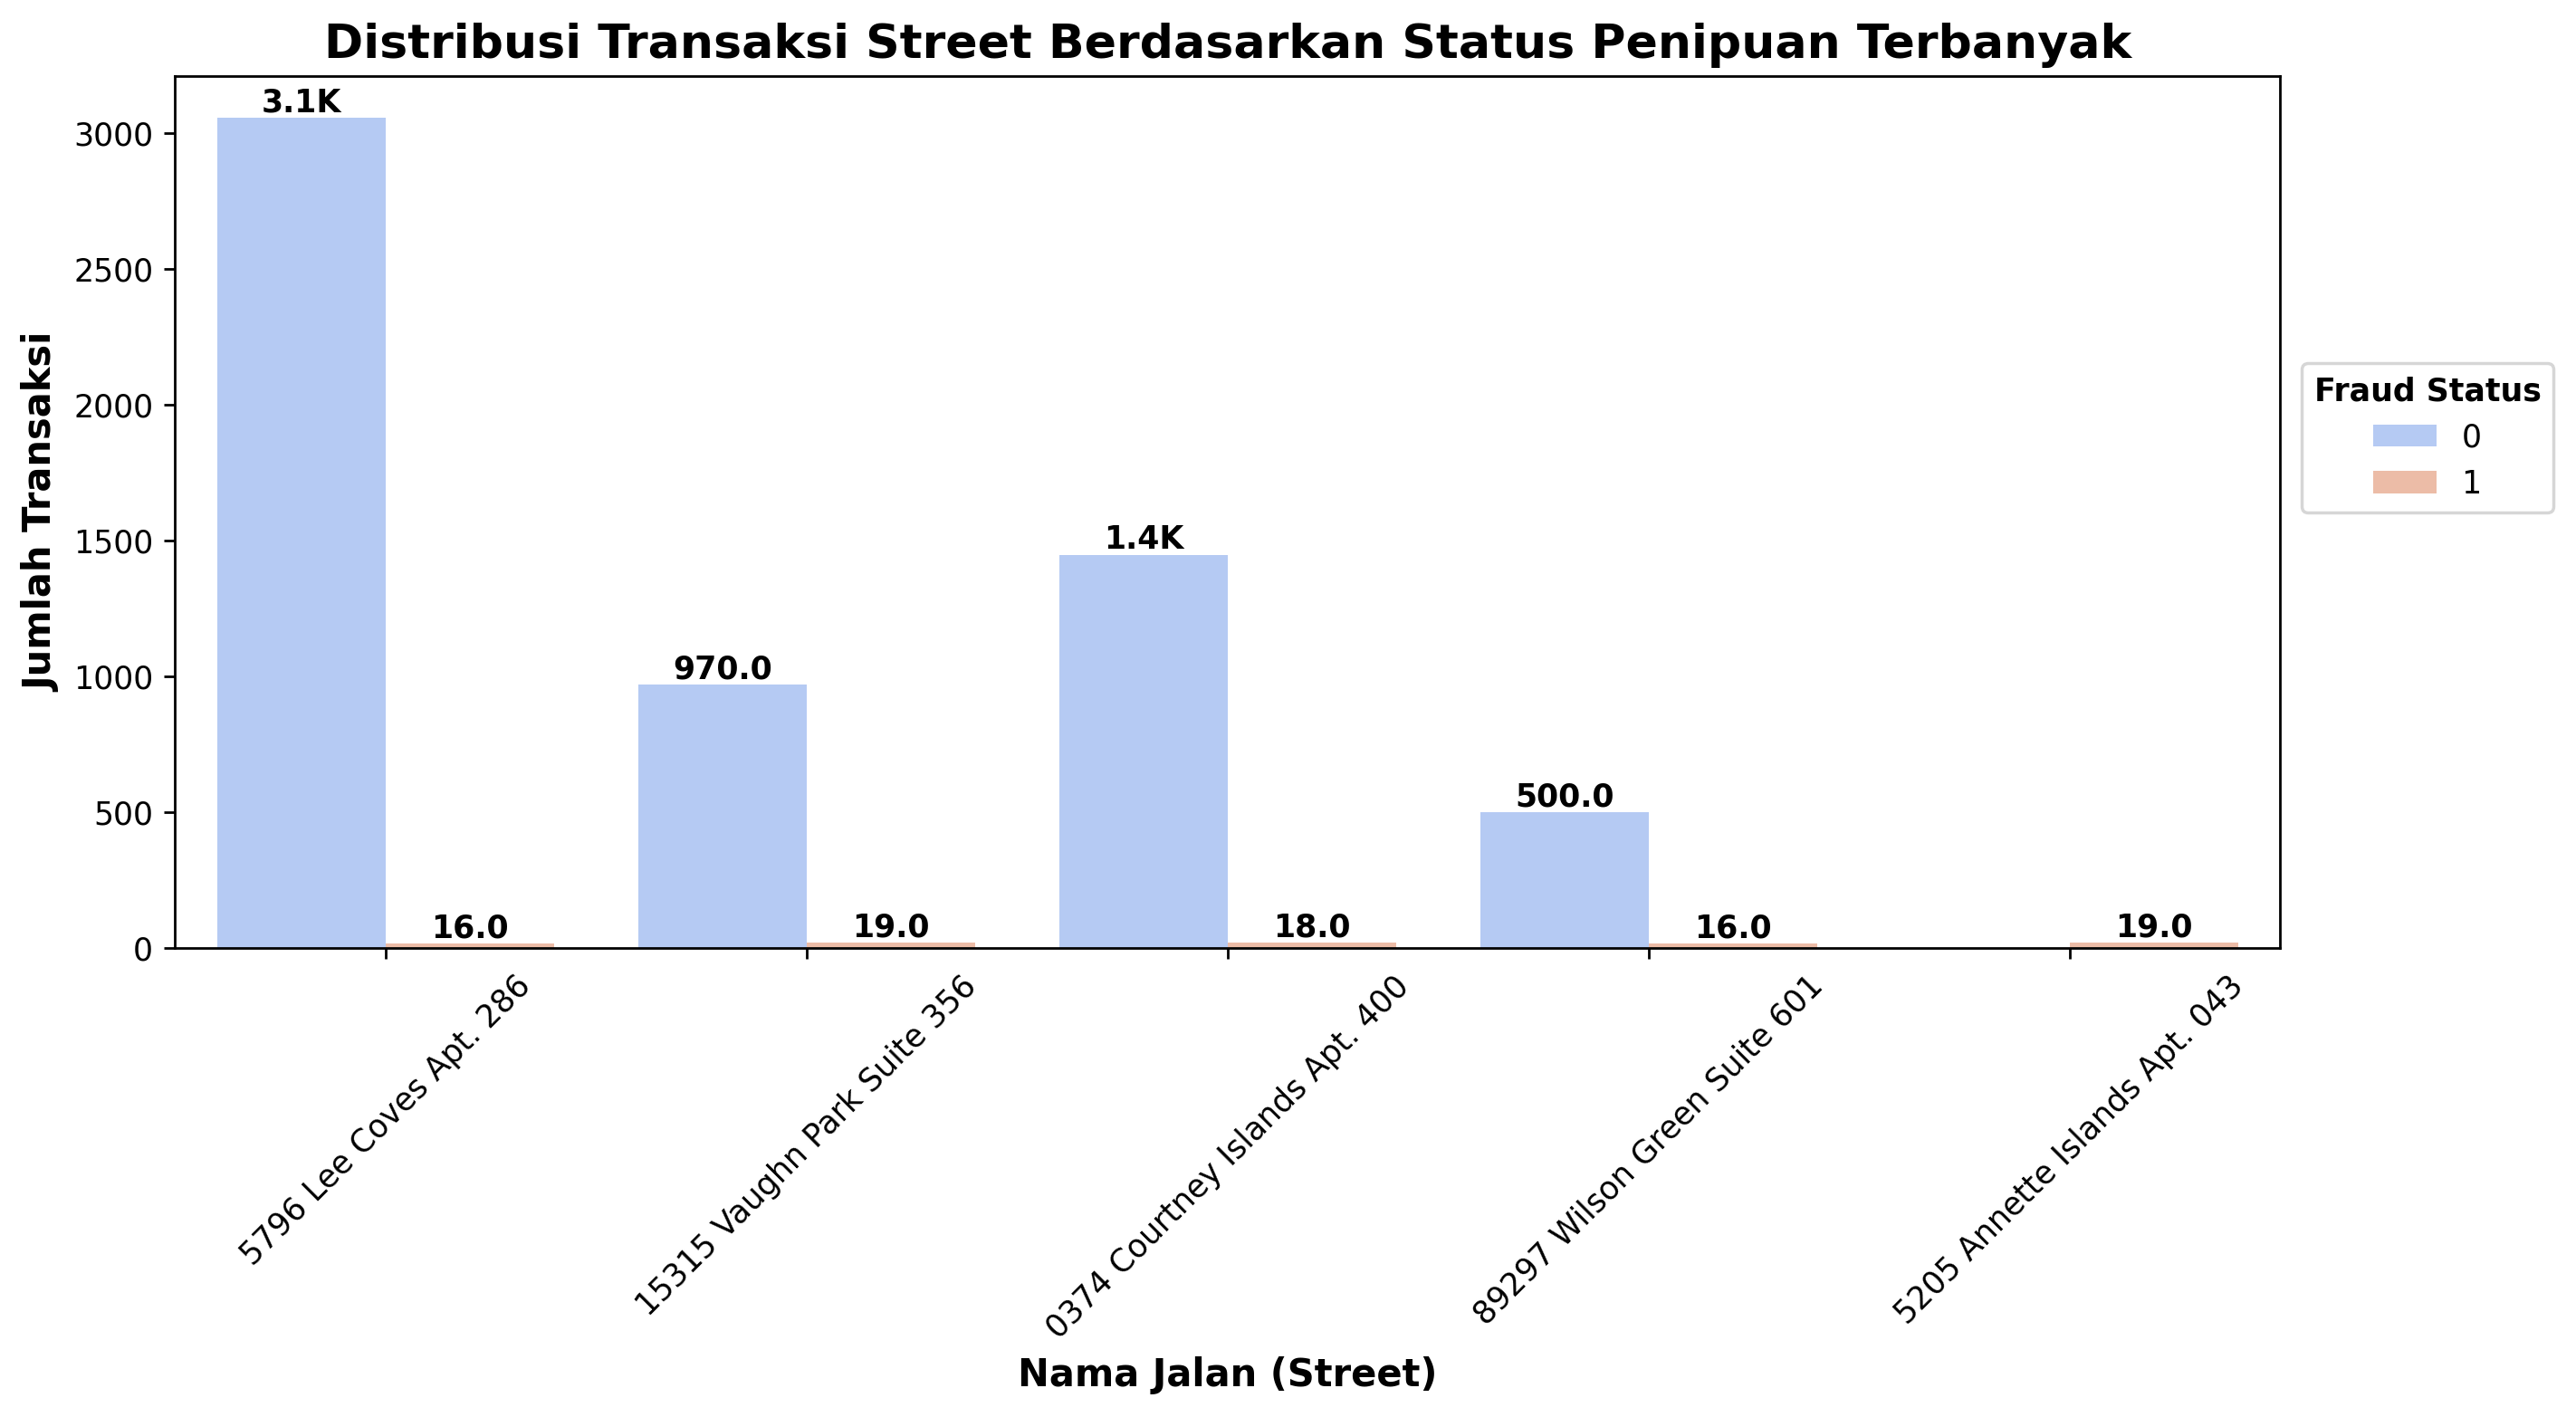

In [39]:
# Memfilter 5 nama jalan teratas berdasarkan jumlah transaksi
top_5_street_fraud = fraud_only['street'].value_counts().nlargest(5).index
df_top_street_fraud = df[df['street'].isin(top_5_street_fraud)]

# Visualisasi distribusi berdasarkan status penipuan di tiap street
ax = sns.countplot(
    data = df_top_street_fraud,
    x = "street",
    hue = "is_fraud",
    palette = 'coolwarm'
)

# Anotasi batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Transaksi Street Berdasarkan Status Penipuan Terbanyak")
plt.xlabel("Nama Jalan (Street)")
plt.ylabel("Jumlah Transaksi")

# Mengatur lokasi legenda
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))
plt.xticks(rotation=45)
plt.show()

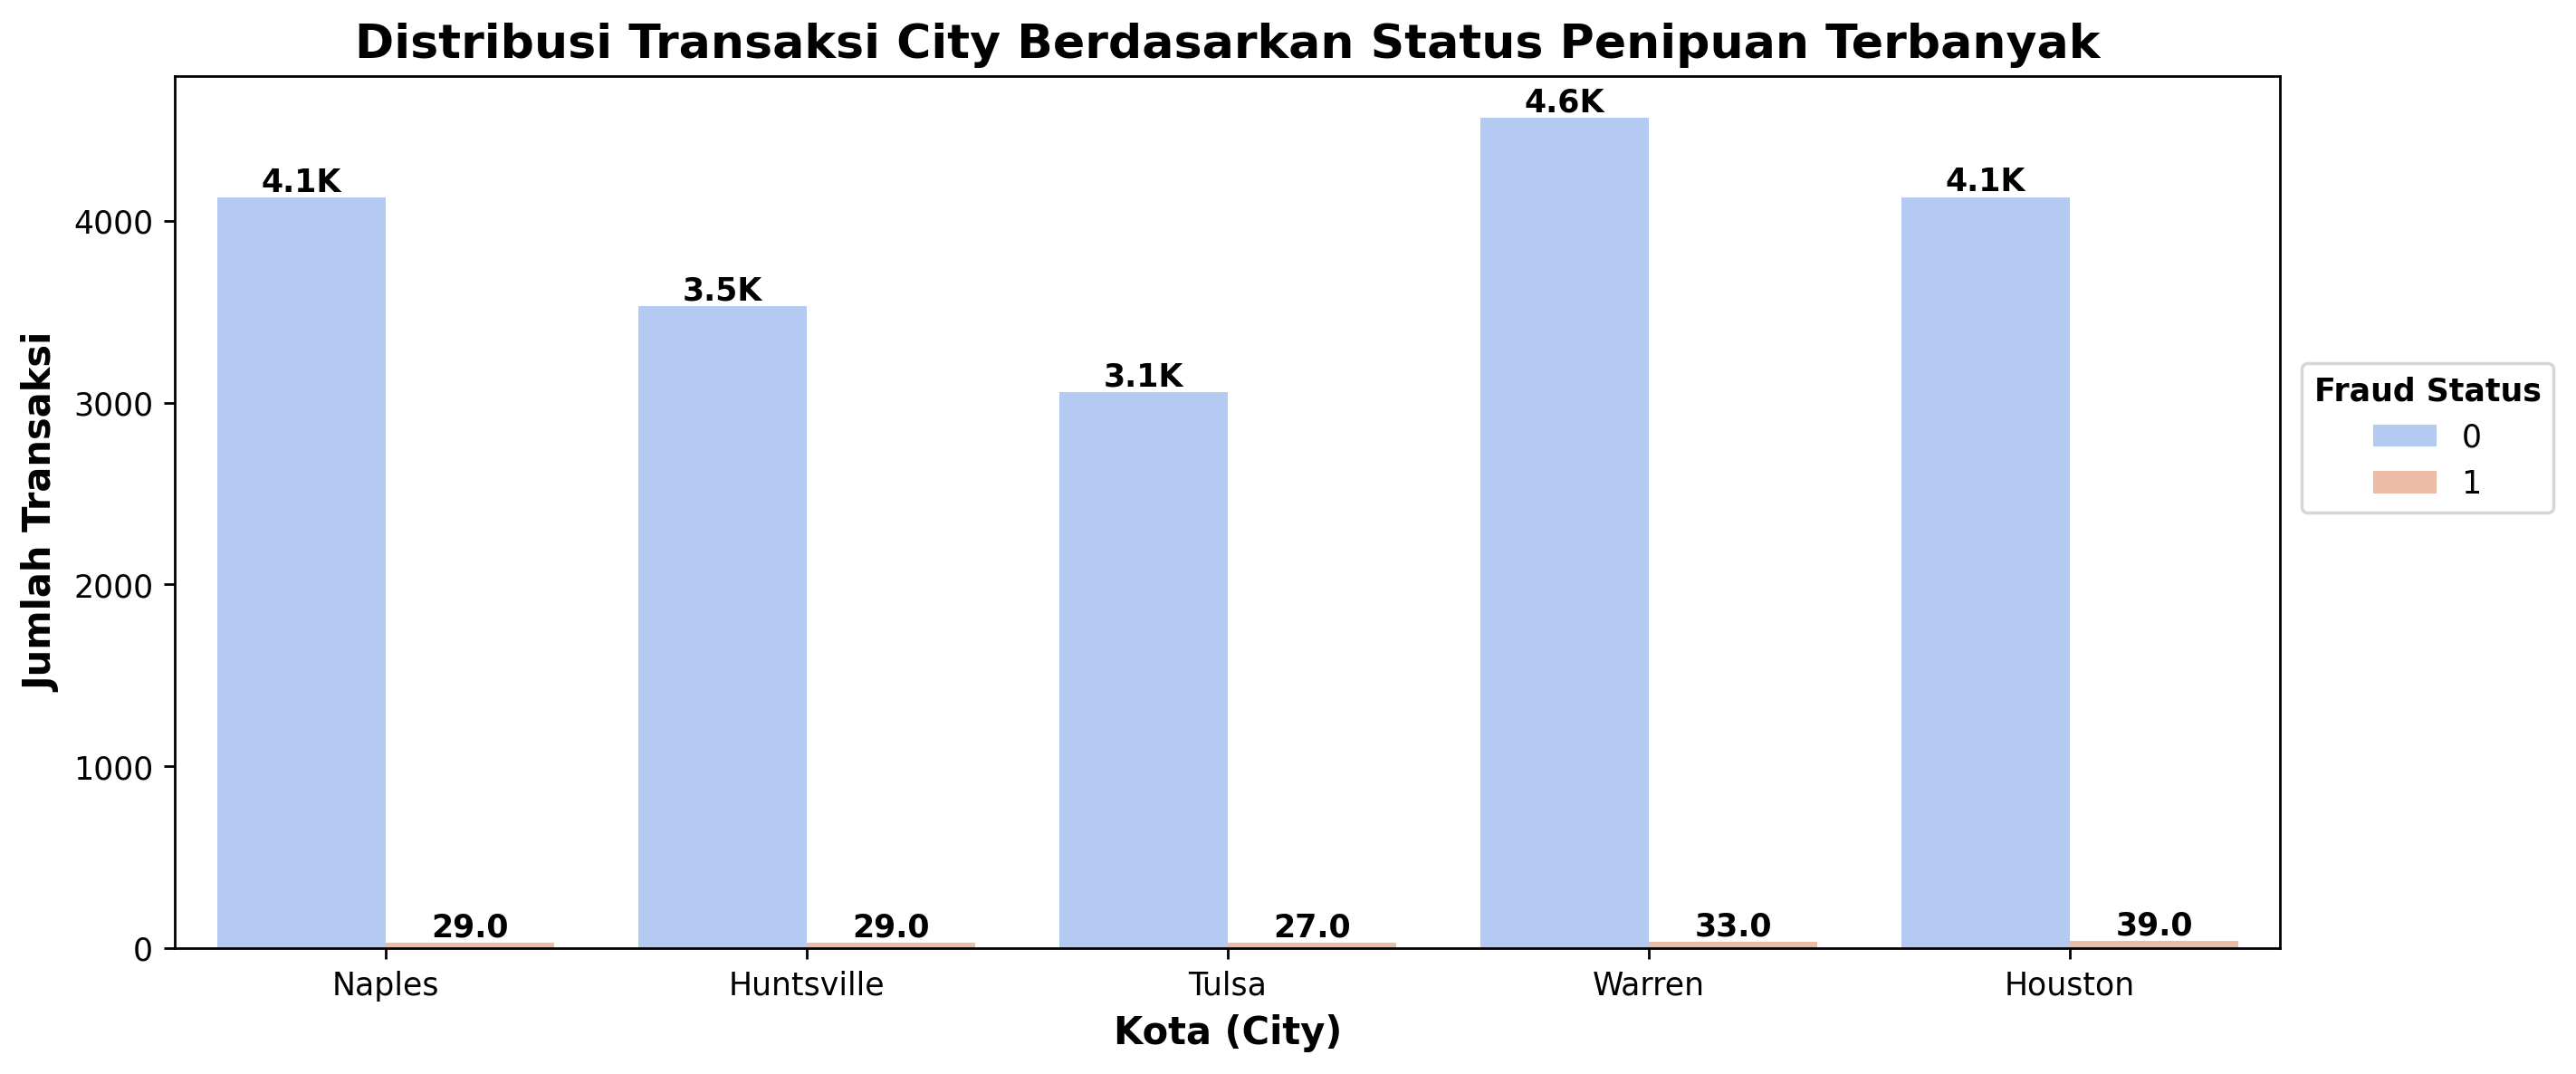

In [40]:
# Memfilter 5 kategori merchant teratas berdasarkan jumlah transaksi
top_5_city_fraud = fraud_only['city'].value_counts().nlargest(5).index
df_top_city_fraud = df[df['city'].isin(top_5_city_fraud)]

# Memeriksa distribusi lokasi kota transaksi berdasarkan status penipuan
ax = sns.countplot(
    data = df_top_city_fraud,
    x = "city",
    hue = "is_fraud",
    palette = 'coolwarm'
)

# Membuat anotasi pada batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Transaksi City Berdasarkan Status Penipuan Terbanyak")
plt.xlabel("Kota (City)")
plt.ylabel("Jumlah Transaksi")

# Mengatur lokasi
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5));

In [41]:
# Mengubah singkatan state dengan nama lengkap
us_state_abbrev = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'MA': 'Massachusetts',
    'MD': 'Maryland',
    'ME': 'Maine',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'NE': 'Nebraska',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NV': 'Nevada',
    'NY': 'New York',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VA': 'Virginia',
    'VT': 'Vermont',
    'WA': 'Washington',
    'WI': 'Wisconsin',
    'WV': 'West Virginia',
    'WY': 'Wyoming'
}
df['state'] = df['state'].map(us_state_abbrev).fillna(df['state'])

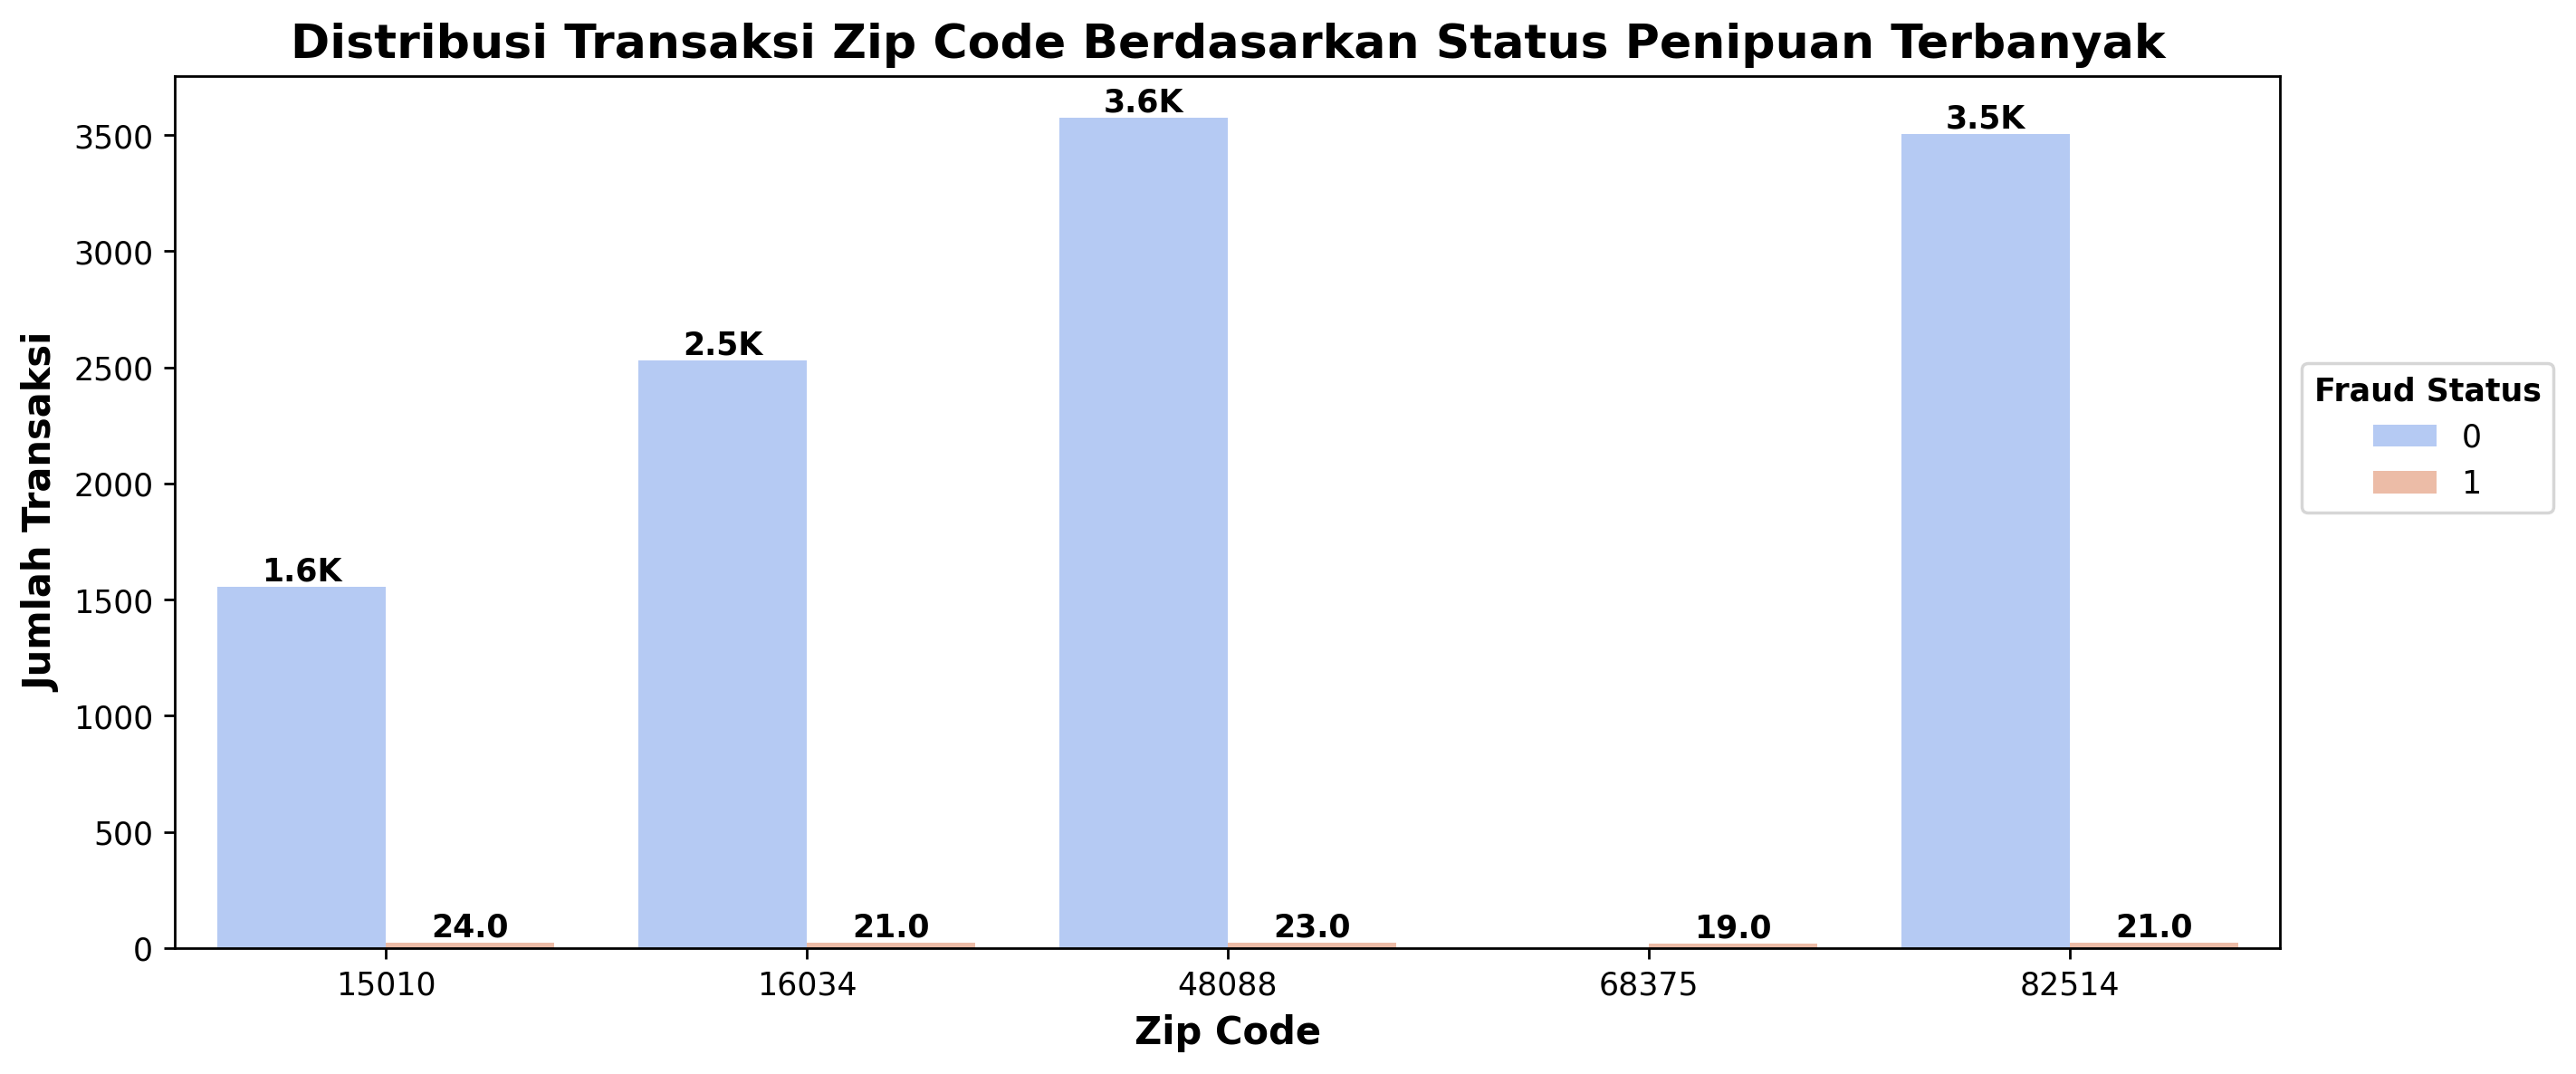

In [43]:
# Memfilter 5 zip code teratas berdasarkan jumlah transaksi
top_5_zip_fraud = fraud_only['zip'].value_counts().nlargest(5).index
df_top_zip_fraud = df[df['zip'].isin(top_5_zip_fraud)]

# Visualisasi distribusi berdasarkan status penipuan di tiap zip code
ax = sns.countplot(
    data = df_top_zip_fraud,
    x = "zip",
    hue = "is_fraud",
    palette = 'coolwarm'
)

# Anotasi batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Transaksi Zip Code Berdasarkan Status Penipuan Terbanyak")
plt.xlabel("Zip Code")
plt.ylabel("Jumlah Transaksi")

# Mengatur lokasi legenda
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))

In [44]:
# Fungsi Haversine untuk hitung jarak antara dua titik koordinat
from math import radians, sin, cos, sqrt, atan2

def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # radius bumi dalam kilometer
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    return R * c

# Hitung jarak dan simpan dalam kolom baru
df['transaction_distance'] = df.apply(lambda row: haversine(
    row['lat'], row['long'], row['merch_lat'], row['merch_long']
), axis=1)
df.head()


,category,amt,gender,street,city,state,zip,lat,long,city_pop,job,trans_num,merch_lat,merch_long,is_fraud,age,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month,transaction_distance
0,Misc Net,4.97,Female,561 Perry Cove,Moravian Falls,North Carolina,28654,36.0788,-81.1781,3495,"Psychologist, counselling",0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,31,Tuesday,0,0,1,1,78.597568
1,Grocery Pos,107.23,Female,43039 Riley Greens Suite 393,Orient,Washington,99160,48.8878,-118.2105,149,Special educational needs teacher,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,41,Tuesday,0,0,1,1,30.212176
2,Entertainment,220.11,Male,594 White Dale Suite 530,Malad City,Idaho,83252,42.1808,-112.2620,4154,Nature conservation officer,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,57,Tuesday,0,0,1,1,108.206083
3,Gas Transport,45.00,Male,9443 Cynthia Court Apt. 038,Boulder,Montana,59632,46.2306,-112.1138,1939,Patent attorney,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,52,Tuesday,1,0,1,1,95.673231
4,Misc Pos,41.96,Male,408 Bradley Rest,Doe Hill,Virginia,24433,38.4207,-79.4629,99,Dance movement psychotherapist,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,33,Tuesday,3,0,1,1,77.556744


In [45]:
# Menghapus kolom yang tidak diperlukan
cols_to_drop = ["lat", "long", "merch_lat", "merch_long", "trans_num"]
df = df.drop(cols_to_drop, axis = 1)
df.head()

,category,amt,gender,street,city,state,zip,city_pop,job,is_fraud,age,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month,transaction_distance
0,Misc Net,4.97,Female,561 Perry Cove,Moravian Falls,North Carolina,28654,3495,"Psychologist, counselling",0,31,Tuesday,0,0,1,1,78.597568
1,Grocery Pos,107.23,Female,43039 Riley Greens Suite 393,Orient,Washington,99160,149,Special educational needs teacher,0,41,Tuesday,0,0,1,1,30.212176
2,Entertainment,220.11,Male,594 White Dale Suite 530,Malad City,Idaho,83252,4154,Nature conservation officer,0,57,Tuesday,0,0,1,1,108.206083
3,Gas Transport,45.00,Male,9443 Cynthia Court Apt. 038,Boulder,Montana,59632,1939,Patent attorney,0,52,Tuesday,1,0,1,1,95.673231
4,Misc Pos,41.96,Male,408 Bradley Rest,Doe Hill,Virginia,24433,99,Dance movement psychotherapist,0,33,Tuesday,3,0,1,1,77.556744


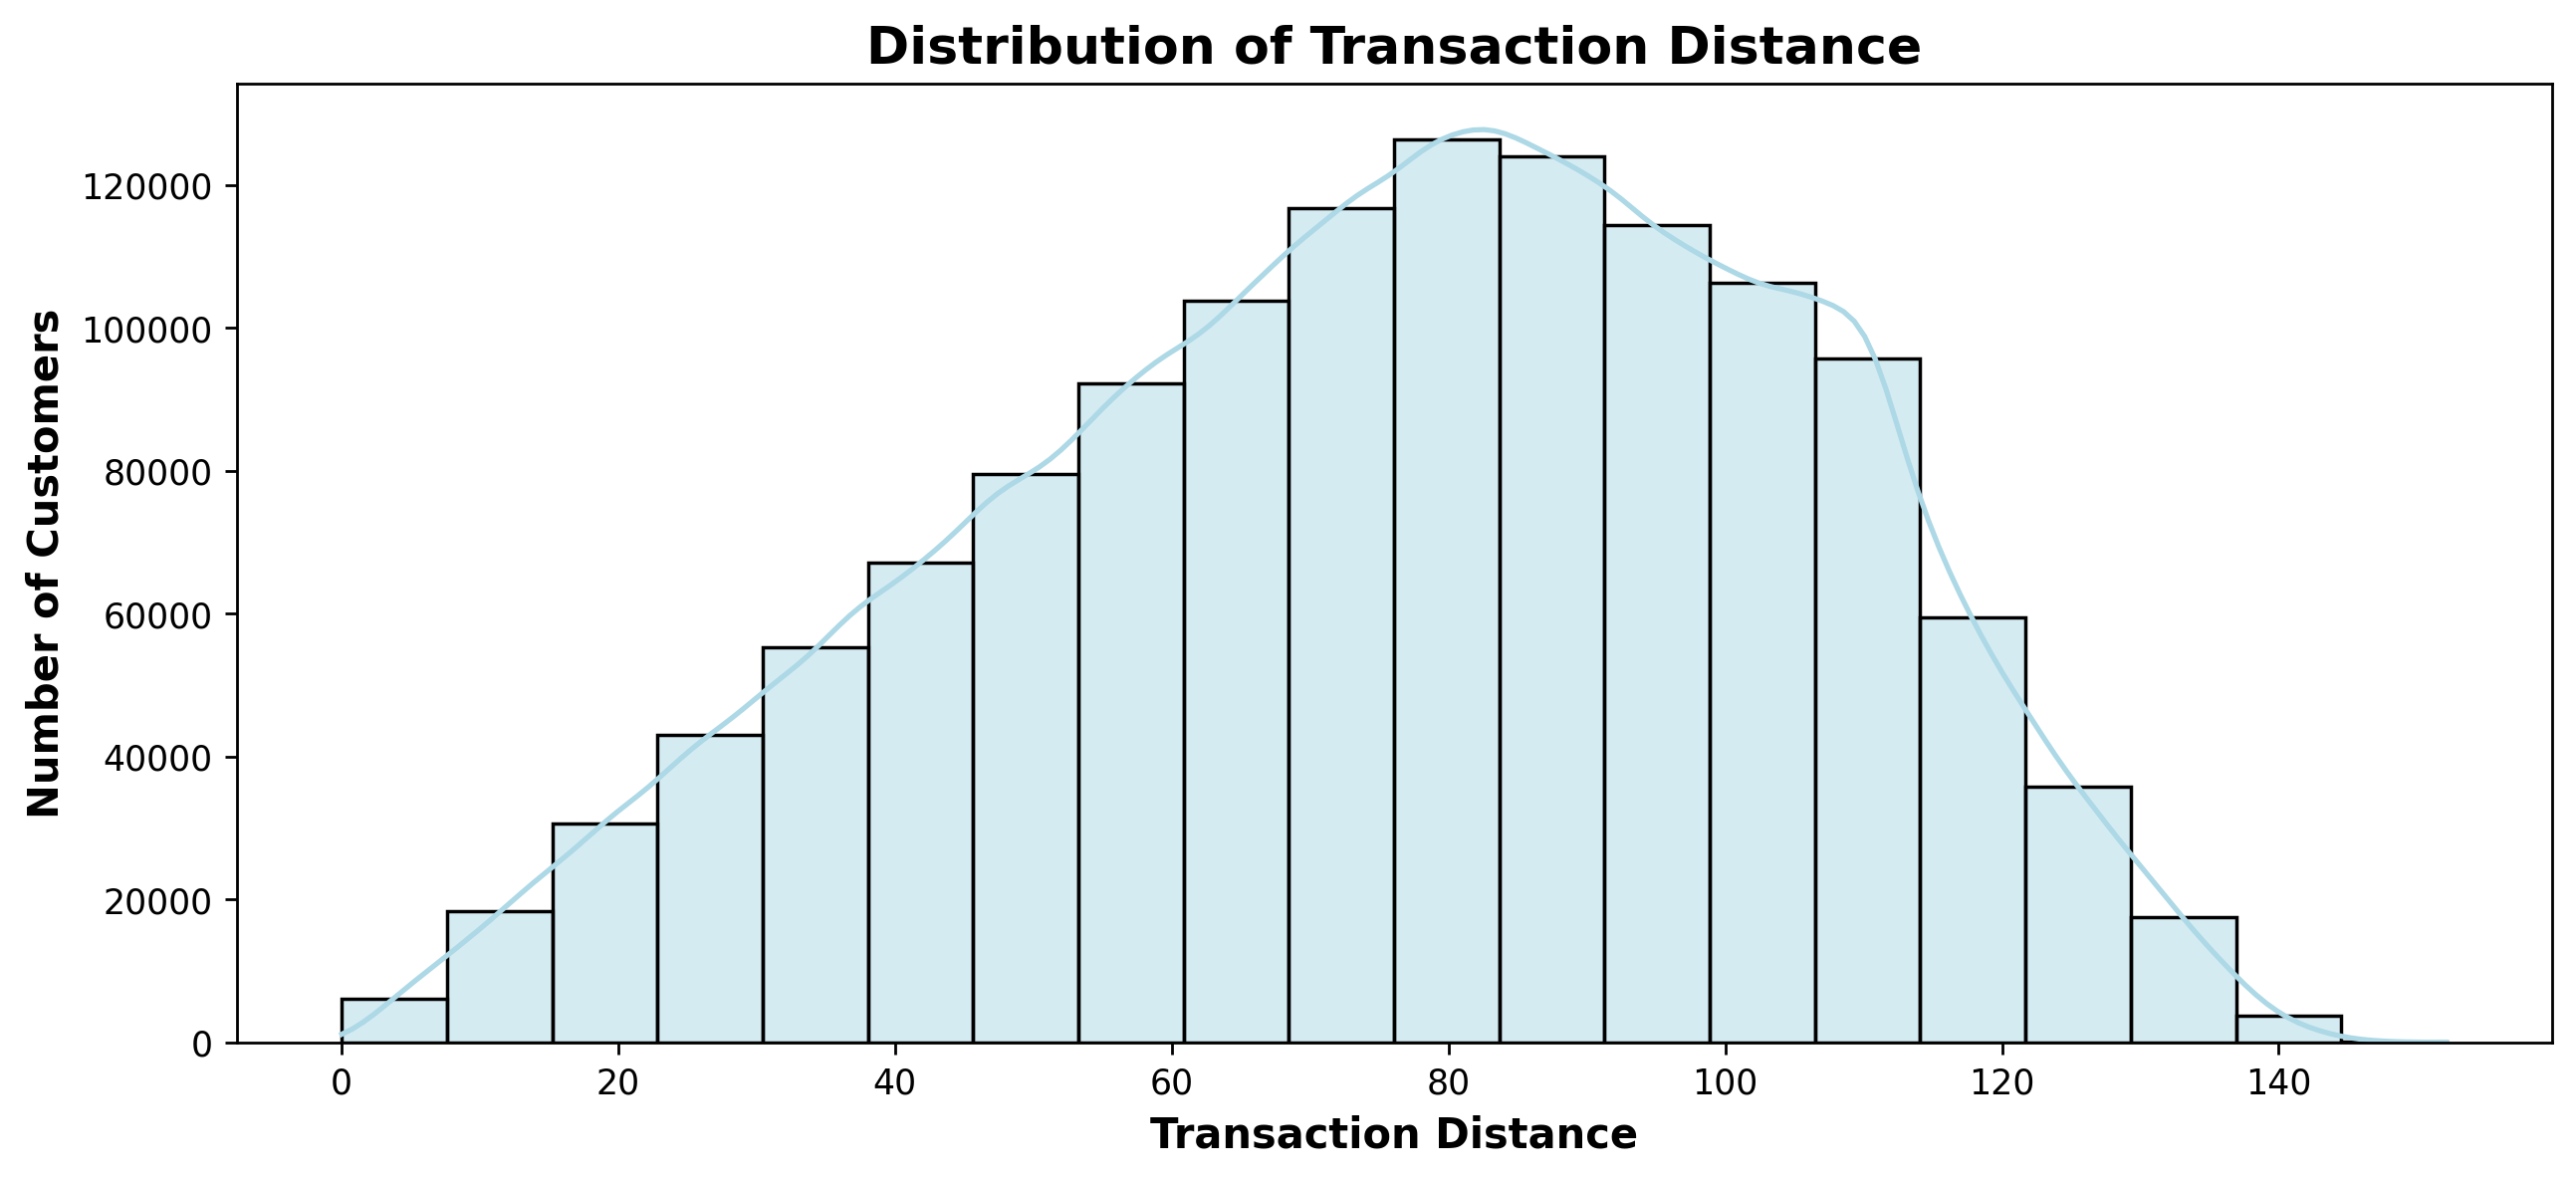

In [46]:
# Checking the distribution of transaction distance
sns.histplot(
    data = df,
    x = "transaction_distance",
    bins = 20,
    kde = True,
    color = "lightblue"
)

# Adding title and labels to the plot
plt.title("Distribution of Transaction Distance")
plt.xlabel("Transaction Distance")
plt.ylabel("Number of Customers")

# Changing the Xtick values
min_value = int(df['transaction_distance'].min())
max_value = int(df['transaction_distance'].max())

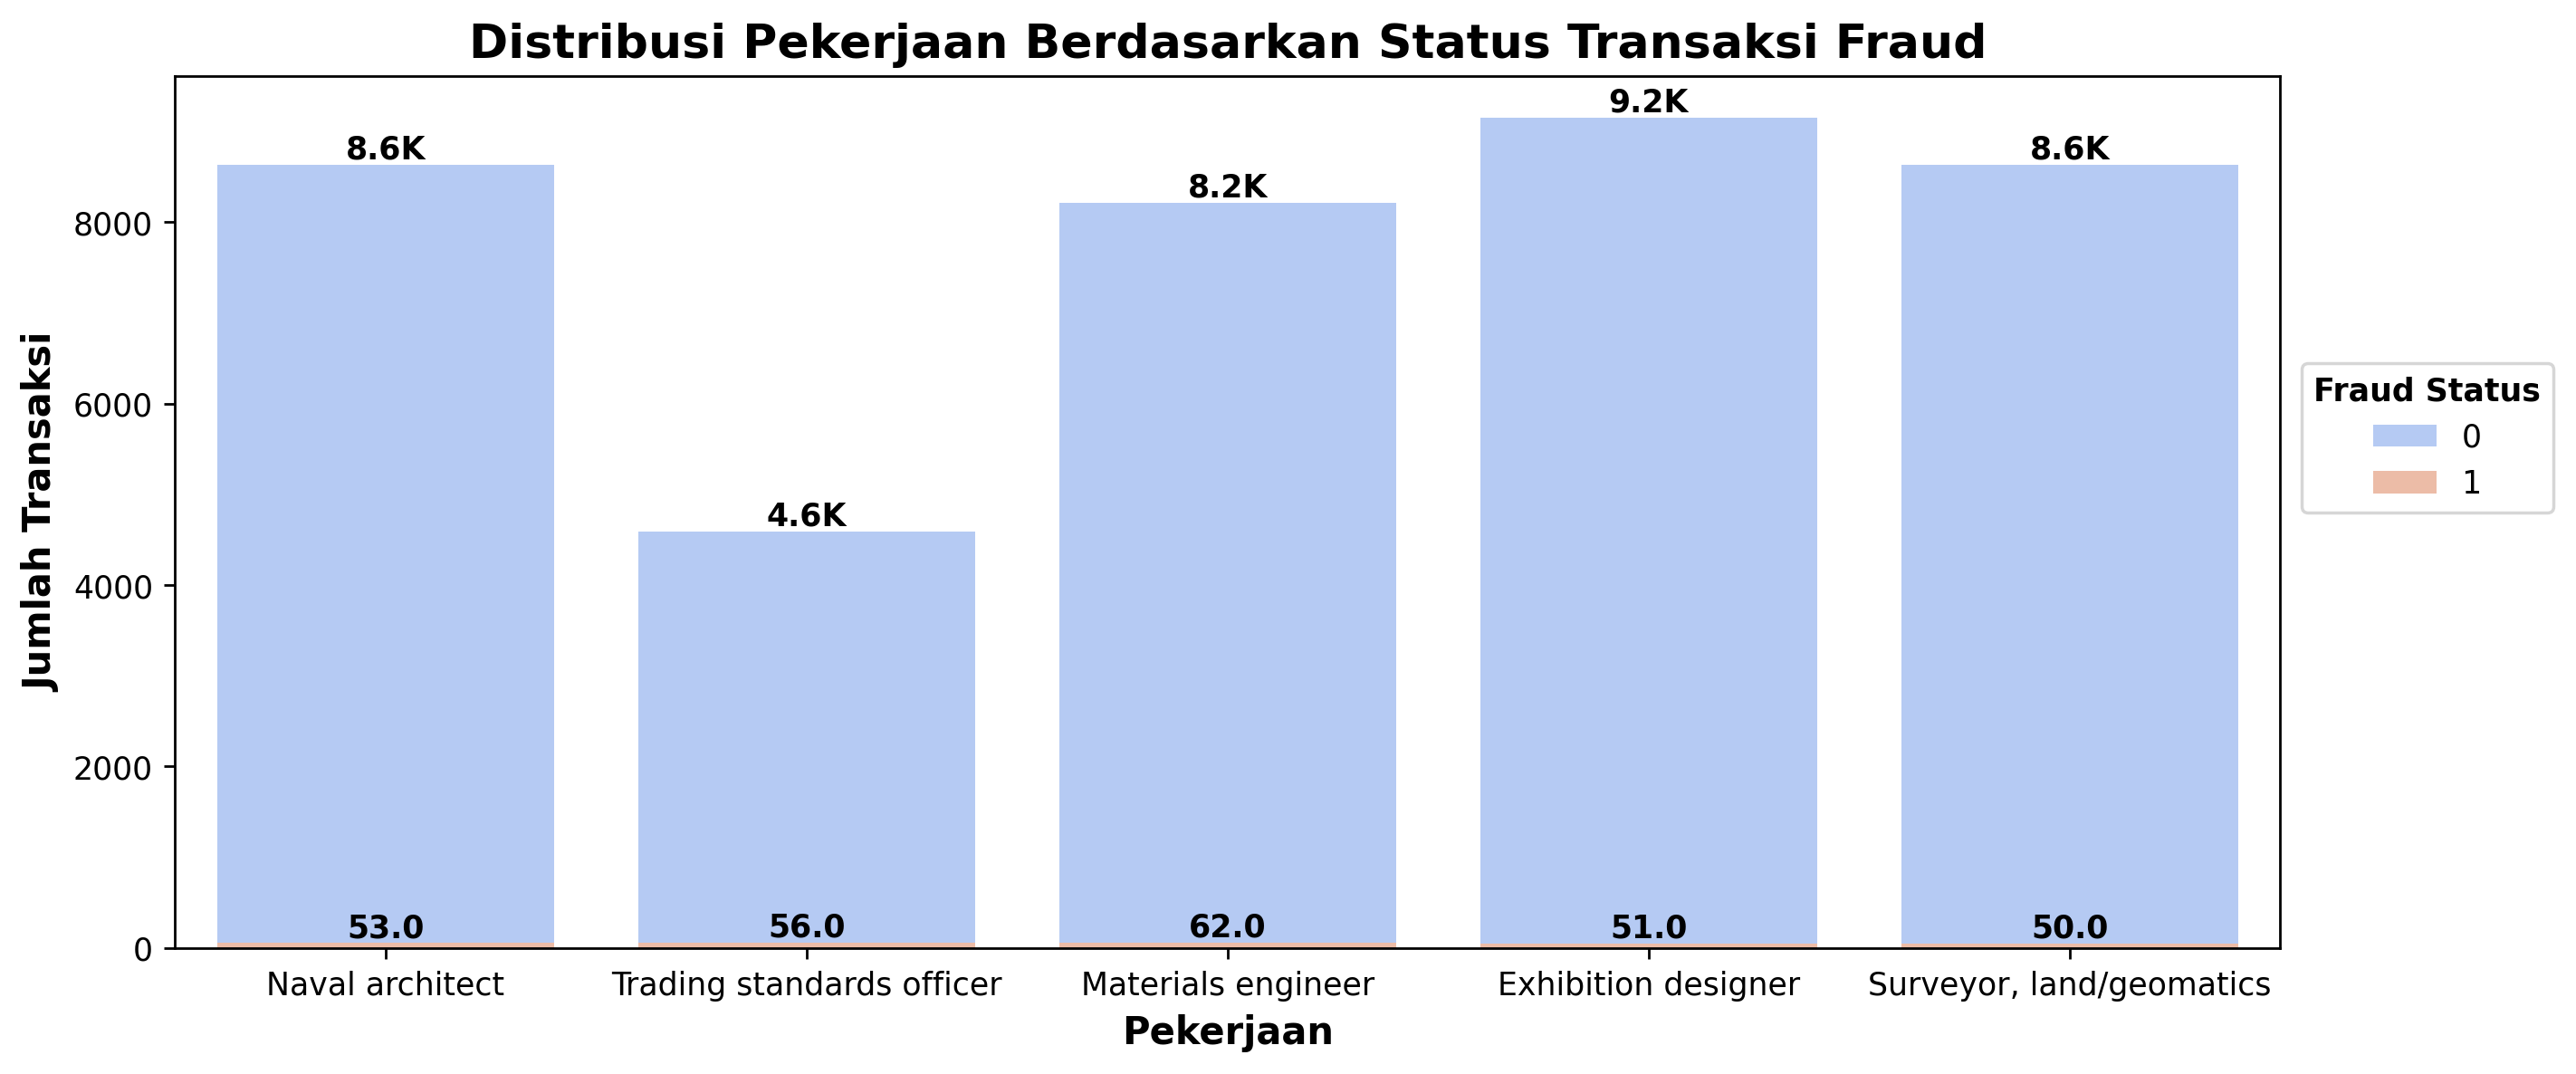

In [47]:
# Memfilter 5 nama jalan teratas berdasarkan jumlah transaksi
top_5_job_fraud = fraud_only['job'].value_counts().nlargest(5).index
df_top_job_fraud = df[df['job'].isin(top_5_job_fraud)]

# Memeriksa distribusi pekerjaan dan status transaksi (fraud vs asli)
ax = sns.countplot(
    data = df_top_job_fraud,
    x = "job",  
    hue = "is_fraud",  
    palette = 'coolwarm',  
    dodge = False
)

# Membuat anotasi pada batang
annotate_bars(ax)

# Menambahkan judul dan label ke plot
plt.title("Distribusi Pekerjaan Berdasarkan Status Transaksi Fraud")
plt.xlabel("Pekerjaan")
plt.ylabel("Jumlah Transaksi")

# Mengatur lokasi legenda
plt.legend(title = "Fraud Status", title_fontproperties = {"weight":"bold"}, loc = (1.01, 0.5))
plt.show()


<Axes: >

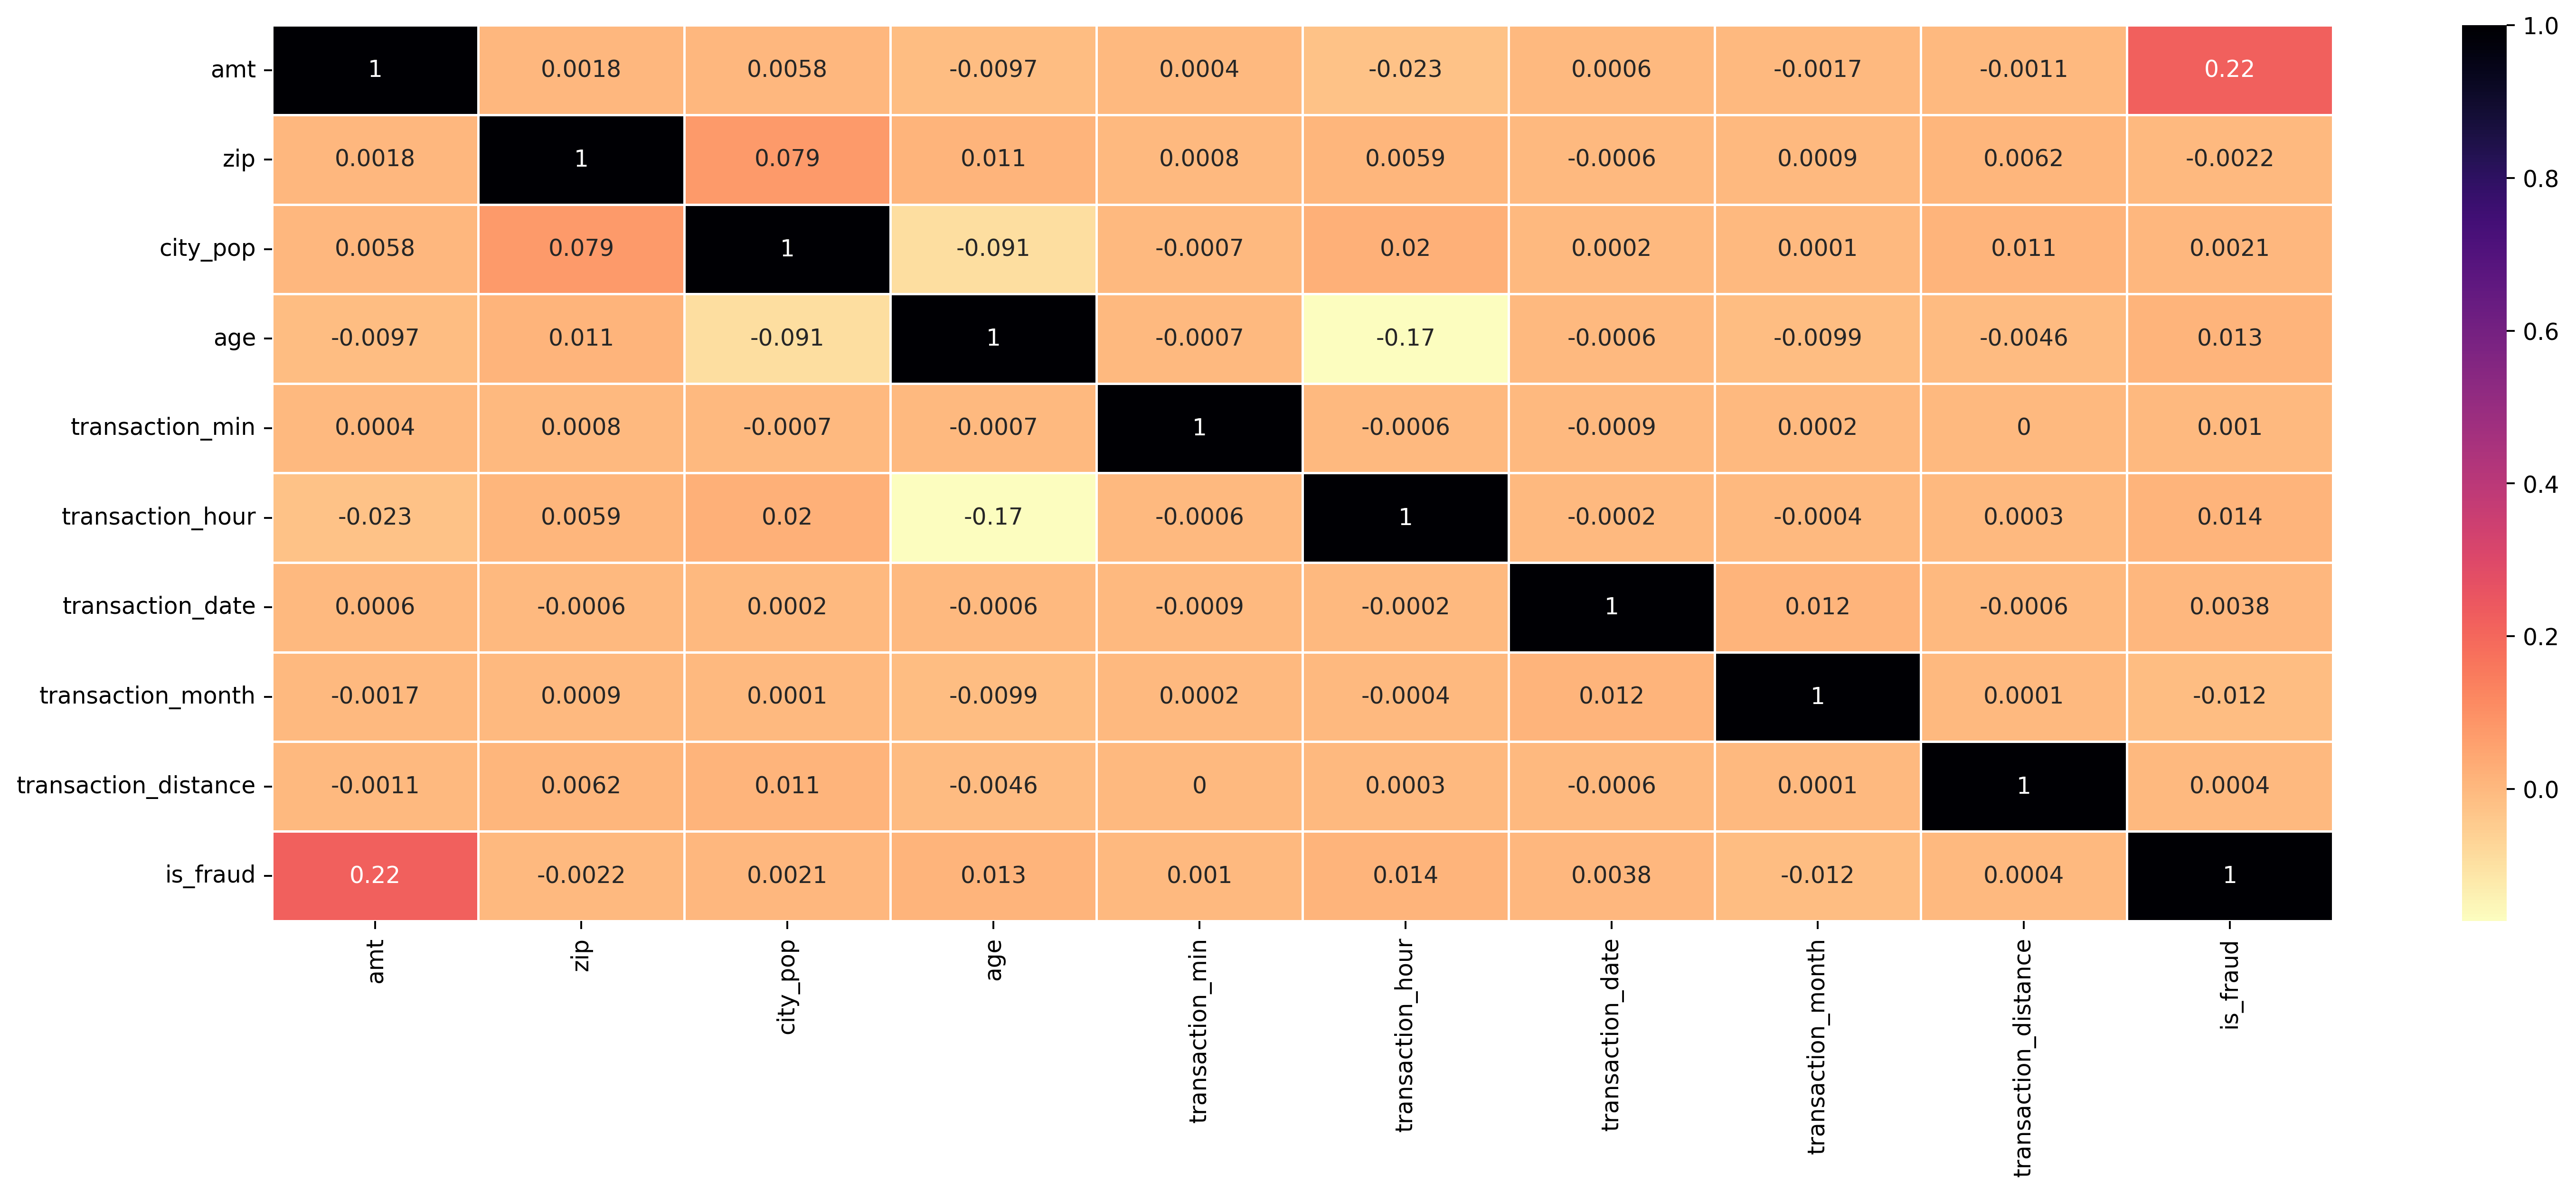

In [48]:
# Mengatur ukuran plot
plt.figure(figsize = (20, 7), dpi = 350)

# Menghitung korelasi dan memindahkan kolom 'is_fraud' ke posisi terakhir
corr = df.corr(numeric_only=True)
corr = corr[[col for col in corr.columns if col != 'is_fraud'] + ['is_fraud']]
corr = corr.reindex([row for row in corr.index if row != 'is_fraud'] + ['is_fraud'])

# Menampilkan heatmap
sns.heatmap(
    np.round(corr, 4), 
    annot=True, 
    linecolor='white', 
    linewidths=1, 
    cmap="magma_r"
)


In [49]:
# Menangani data yang tidak seimbang dengan undersampling
from imblearn.under_sampling import RandomUnderSampler

# Pemilihan model
from sklearn.model_selection import train_test_split, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import pickle

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Preprocessing
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [50]:
# Membagi data menjadi X dan y
X = df.drop("is_fraud", axis = 1)
y = df["is_fraud"]

In [51]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((1037340, 16), (1037340,)), ((259335, 16), (259335,)))

In [52]:
# Memakai RandomUnderSampler untuk undersampling data
under_sampler = RandomUnderSampler(random_state=101)
X_train_resampled, y_train_resampled = under_sampler.fit_resample(X_train, y_train)
(X_train_resampled.shape, y_train_resampled.shape)

((12010, 16), (12010,))

In [53]:
# Memeriksa jumlah instance untuk setiap kelas dalam set pelatihan setelah resampling
print(f"Jumlah untuk Kelas Negatif: {len(y_train_resampled) - sum(y_train_resampled)}")
print(f"Jumlah untuk Kelas Positif: {sum(y_train_resampled)}")

Jumlah untuk Kelas Negatif: 6005
Jumlah untuk Kelas Positif: 6005


In [54]:
# Menggabungkan X_train_resampled dan y_train_resampled ke satu DataFrame
resampled_df = pd.concat([X_train_resampled, y_train_resampled], axis=1)

# Menyimpan ke dalam file CSV
resampled_df.to_csv("fraudTrain_dataset_cleaned.csv", index=False)

print("fraudTrain_dataset_cleaned.csv berhasil disimpan.")

fraudTrain_dataset_cleaned.csv berhasil disimpan.


In [ ]:
df= pd.read_csv('fraudTrain_dataset_cleaned.csv')

df.head()

,category,amt,gender,street,city,state,zip,city_pop,job,age,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month,transaction_distance,is_fraud
0,Food Dining,16.31,Male,7188 Melissa Crest Apt. 151,New Holstein,Wisconsin,53061,5196,Child psychotherapist,42,Friday,36,21,17,4,118.051926,0
1,Misc Net,71.86,Male,4130 Tiffany Glen Apt. 562,San Antonio,Texas,78248,1595797,Exhibition designer,44,Wednesday,8,11,18,9,83.924406,0
2,Home,43.09,Female,2481 Mills Lock,Plainfield,New Jersey,7060,71485,Leisure centre manager,45,Saturday,1,20,11,5,92.378339,0
3,Shopping Net,58.22,Female,4456 Dunn Roads,Meredith,Colorado,81642,61,Public relations account executive,81,Tuesday,11,1,2,6,90.065008,0
4,Grocery Pos,118.43,Female,222 Freeman Islands,Whigham,Georgia,39897,3430,"Editor, commissioning",69,Monday,21,10,21,10,91.651140,0


In [56]:
# Membagi data menjadi X dan y
X = df.drop("is_fraud", axis = 1)
y = df["is_fraud"]

In [57]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((9608, 16), (9608,)), ((2402, 16), (2402,)))

In [58]:
# Memeriksa tipe data object
df.select_dtypes(include='object').columns

Index(['category', 'gender', 'street', 'city', 'state', 'job', 'day_of_week'], dtype='object')

In [59]:
# Memfilter kolom kategoris
categorical_cols= ["category", "gender","street", "city", "state", "job", "day_of_week"]

In [60]:
# Menggunakan OrdinalEncoder untuk mengkodekan data kategorikal
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_train.loc[:, categorical_cols] = encoder.fit_transform(X_train.loc[:, categorical_cols])
X_test.loc[:, categorical_cols] = encoder.transform(X_test.loc[:, categorical_cols])

X_train.head()

,category,amt,gender,street,city,state,zip,city_pop,job,age,day_of_week,transaction_min,transaction_hour,transaction_date,transaction_month,transaction_distance
10797,2.0,8.79,0.0,184.0,677.0,25.0,63665,241,254.0,46,3.0,46,2,19,1,66.570145
3645,11.0,100.93,1.0,101.0,742.0,38.0,15077,198,417.0,41,3.0,19,7,24,3,32.856079
5975,4.0,121.16,0.0,438.0,739.0,48.0,25442,1925,444.0,53,0.0,53,5,28,6,78.049212
11266,2.0,19.54,1.0,939.0,464.0,17.0,41836,798,189.0,94,5.0,1,1,17,3,74.491109
4413,2.0,77.91,1.0,620.0,4.0,35.0,44307,272134,59.0,55,4.0,39,4,11,7,100.355926


In [61]:
# Simpan encoder
with open("ordinal_encoder.pkl", "wb") as f:
    pickle.dump(encoder, f)

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Simpan scaler
with open("fraud_scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [64]:
# Kamus model yang akan diuji
models = {
    "LogisticRegression" : LogisticRegression(C=0.01, solver = "saga", class_weight="balanced", random_state=101),
    "RandomForestClassifier" : RandomForestClassifier(n_estimators=50, max_depth=7, class_weight="balanced", random_state=101),
    "XGBClassifier" : XGBClassifier(n_estimators=50, max_depth=7, random_state = 101)
}

In [66]:
# Inisialisasi kamus untuk menyimpan kinerja model
model_performance = {}

# Melakukan pengulangan melalui setiap model, pelatihan, dan mengevaluasi kinerja
for model_name, model in models.items():
    print(f"Training {model_name}")

    # Melatih model
    model.fit(X_train_scaled, y_train)
    
    # Membuat prediksi pada set pengujian
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Untuk ROC-AUC
    
    # Pelatihan dan Pengujian Skor CV
    training_cv_score = cross_val_score(model, X_train_scaled, y_train, scoring = "roc_auc")
    testing_cv_score = cross_val_score(model, X_test_scaled, y_test, scoring = "roc_auc")
    
    # Mengevaluasi model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
    
    # Menyimpan metrik kinerja untuk setiap model
    model_performance[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC AUC': roc_auc,
        "TP" : TP,
        "TN" : TN,
        "FP" : FP,
        "FN" : FN,
        "Avg Training CV Score" : np.mean(training_cv_score),
        "Avg Testing CV Score" : np.mean(testing_cv_score),
        "Trainning CV Score Std" : np.std(training_cv_score),
        "Testing CV Score Std" : np.std(testing_cv_score)
    }
    
    print(f"Done Training {model_name}\n")

Training LogisticRegression
Done Training LogisticRegression

Training RandomForestClassifier
Done Training RandomForestClassifier

Training XGBClassifier
Done Training XGBClassifier



In [67]:
# Memeriksa kinerja berbagai model
model_performance_df = pd.DataFrame(model_performance)
model_performance_df

,LogisticRegression,RandomForestClassifier,XGBClassifier
Accuracy,0.862198,0.950874,0.979600
Precision,0.949947,0.952911,0.975527
Recall,0.758503,0.946429,0.982993
F1-Score,0.843499,0.949659,0.979246
ROC AUC,0.867986,0.986692,0.998057
TP,892.000000,1113.000000,1156.000000
TN,1179.000000,1171.000000,1197.000000
FP,47.000000,55.000000,29.000000
FN,284.000000,63.000000,20.000000
Avg Training CV Score,0.860494,0.985493,0.996734


In [68]:
# Ambil model XGBoost dari dictionary models
xgboost = models['XGBClassifier']

# Simpan model ke dalam file .pkl
with open('xgboost_fraud_model.pkl', 'wb') as file:
    pickle.dump(xgboost, file)  

print("✅ xgboost_fraud_model.pkl berhasil di simpan")

✅ xgboost_fraud_model.pkl berhasil di simpan
